# Attention : 
# Faire "File -> Save a copy in Drive" avant de commencer à modifier le notebook, sinon vos modifications ne seront pas sauvegardées.


In [ ]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
!unzip -j TP3-4.zip

--2021-10-14 21:03:00--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13421167 (13M) [application/zip]
Saving to: ‘TP3-4.zip’

TP3-4.zip           100%[===================>]  12.80M  13.0MB/s    in 1.0s    

2021-10-14 21:03:01 (13.0 MB/s) - ‘TP3-4.zip’ saved [13421167/13421167]

Archive:  TP3-4.zip
  inflating: tme5.py                 
  inflating: mnist.mat               
  inflating: circles.py              
  inflating: circles.mat             


In [ ]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'tme5.py'

# Partie 1 : Forward et Backward manuels

In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wh, Wy, bh, by
    
    params["Wh"] = torch.randn(nx, nh) * 0.3
    params["Wy"] = torch.randn(nh, ny) * 0.3
    params["bh"] = torch.zeros(1, nh) * 0.3
    params["by"] = torch.zeros(1, ny) * 0.3
    
    ####################
    ##      FIN        #
    ####################
    return params

In [ ]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(1)
    ny = params['Wy'].size(1)

    outputs = {}

    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres X, htilde, h, ytilde, yhat
    
    outputs["X"] = X
    outputs["htilde"] = torch.mm(outputs["X"], params['Wh']) + params['bh']
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params['Wy']) + params['by']
    outputs["yhat"] = torch.nn.functional.softmax(outputs["ytilde"],dim=1)
    
    ####################
    ##      FIN        #
    ####################

    return outputs['yhat'], outputs

In [ ]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Votre code ici  ##
    #####################

    L = - torch.sum(torch.sum(Y * torch.log(Yhat))) / Y.size(0)
    _, indsY = torch.max(Y, 1)
    _, indsYhat = torch.max(Yhat, 1)

    sum = 0
    for i in range(len(indsY)):
      if indsY[i] == indsYhat[i]:
        sum = sum + 1

    acc = sum / Yhat.size(0)

    ####################
    ##      FIN        #
    ####################

    return L, acc*100

In [ ]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wy, Wh, by, bh
    
    grads["Wy"] = torch.mm(outputs['h'].T, outputs['yhat'] - Y)
    grads["Wh"] = torch.mm(outputs['X'].T, (torch.mm(outputs['yhat'] - Y, params['Wy'].T) * (1 - outputs['h']**2)))
    grads["by"] = torch.sum(outputs['yhat'] - Y, dim=0)
    grads["bh"] = torch.sum(torch.mm(outputs['yhat'] - Y, params['Wy'].T) * (1 - outputs['h']**2), dim=0)
    
    ####################
    ##      FIN        #
    ####################
    return grads

In [ ]:
def sgd(params, grads, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour le contenu de params

    params["Wh"] = params['Wh'] - eta * grads['Wh']
    params["Wy"] = params['Wy'] - eta * grads['Wy']
    params["bh"] = params['bh'] - eta * grads['bh']
    params["by"] = params['by'] - eta * grads['by']

    ####################
    ##      FIN        #
    ####################
    return params

## Algorithme global d'apprentissage (manuel)

torch.Size([200, 2])


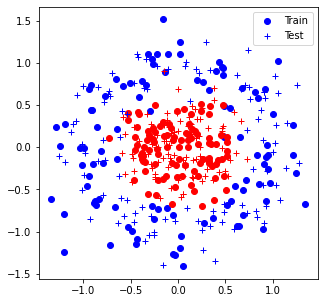

Iter 0: Acc train 63.5% (0.69), acc test 62.0% (0.69)


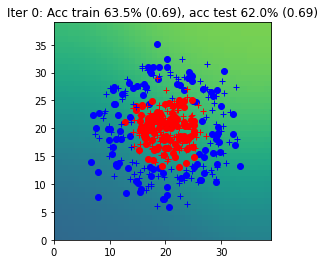

Iter 1: Acc train 39.0% (0.69), acc test 37.0% (0.70)


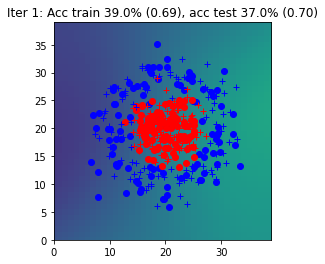

Iter 2: Acc train 49.5% (0.69), acc test 48.0% (0.69)


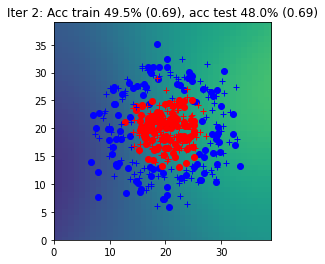

Iter 3: Acc train 43.0% (0.68), acc test 44.5% (0.69)


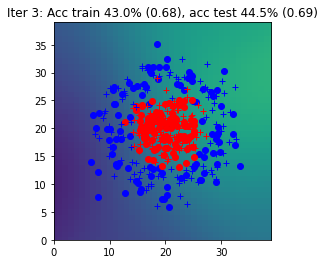

Iter 4: Acc train 63.0% (0.68), acc test 61.0% (0.68)


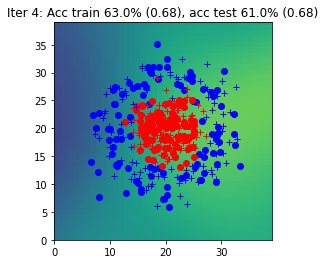

Iter 5: Acc train 53.0% (0.67), acc test 52.0% (0.67)


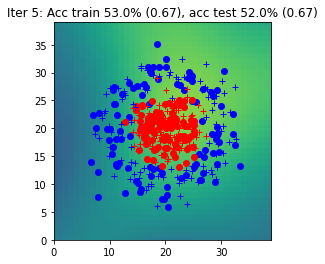

Iter 6: Acc train 68.0% (0.65), acc test 67.0% (0.65)


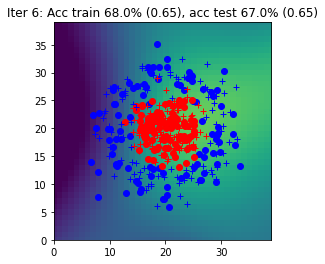

Iter 7: Acc train 52.0% (0.68), acc test 53.5% (0.69)


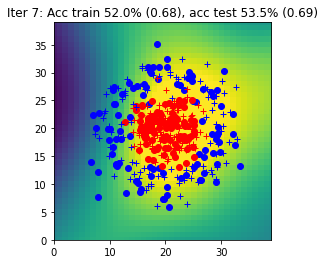

Iter 8: Acc train 80.5% (0.59), acc test 84.0% (0.59)


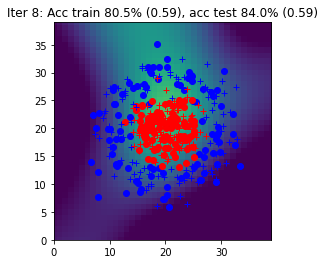

Iter 9: Acc train 69.0% (0.56), acc test 65.5% (0.56)


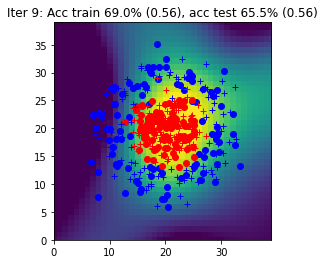

Iter 10: Acc train 80.0% (0.50), acc test 79.0% (0.49)


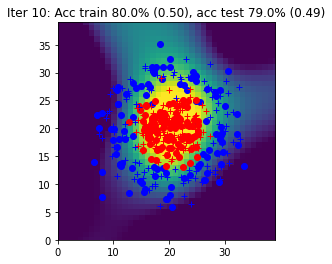

Iter 11: Acc train 95.0% (0.44), acc test 92.0% (0.44)


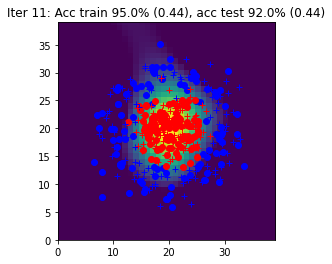

Iter 12: Acc train 89.0% (0.41), acc test 88.0% (0.41)


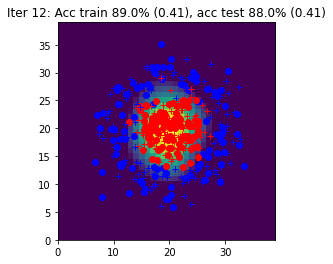

Iter 13: Acc train 95.0% (0.33), acc test 96.0% (0.33)


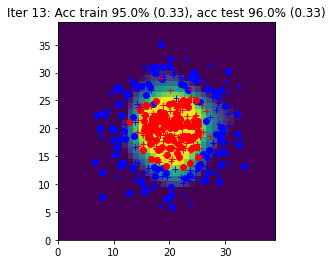

Iter 14: Acc train 95.5% (0.30), acc test 93.0% (0.30)


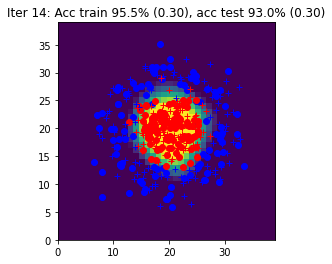

Iter 15: Acc train 95.5% (0.26), acc test 94.0% (0.28)


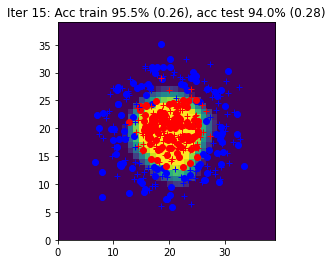

Iter 16: Acc train 96.0% (0.24), acc test 94.0% (0.25)


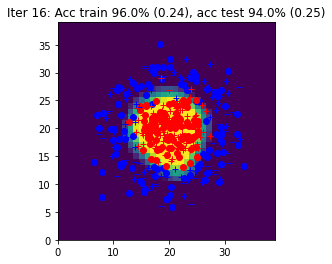

Iter 17: Acc train 96.5% (0.21), acc test 94.0% (0.22)


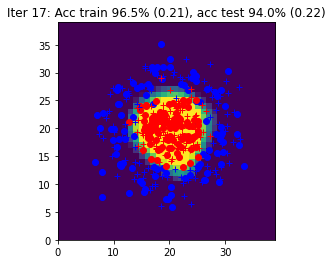

Iter 18: Acc train 93.5% (0.22), acc test 91.5% (0.24)


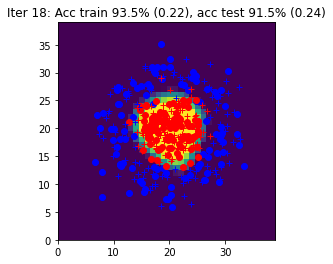

Iter 19: Acc train 96.0% (0.19), acc test 94.0% (0.21)


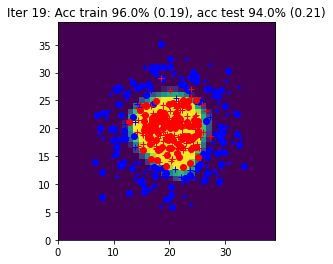

Iter 20: Acc train 96.0% (0.18), acc test 93.0% (0.19)


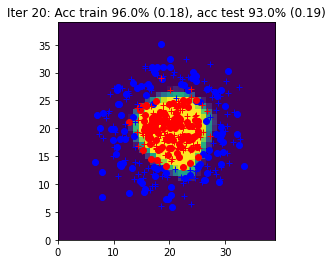

Iter 21: Acc train 95.5% (0.17), acc test 94.0% (0.20)


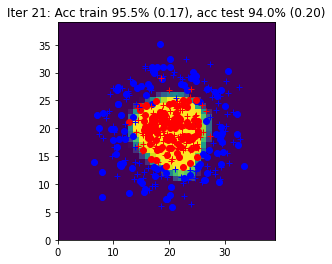

Iter 22: Acc train 96.5% (0.16), acc test 93.0% (0.18)


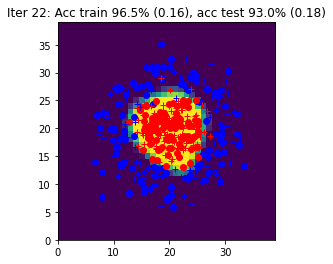

Iter 23: Acc train 95.5% (0.16), acc test 93.0% (0.17)


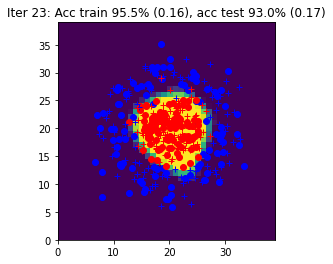

Iter 24: Acc train 96.5% (0.15), acc test 94.0% (0.17)


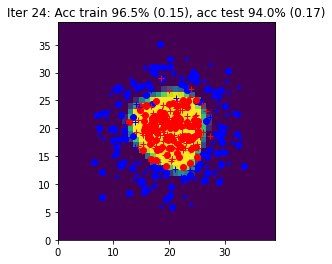

Iter 25: Acc train 95.5% (0.15), acc test 92.5% (0.17)


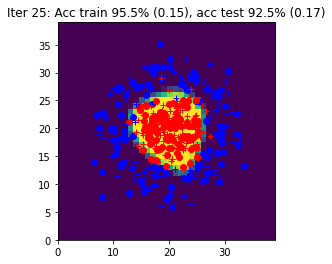

Iter 26: Acc train 97.5% (0.14), acc test 94.0% (0.17)


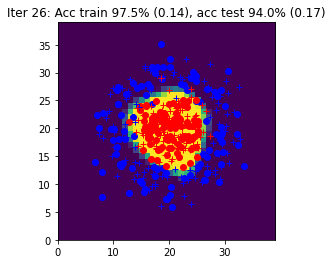

Iter 27: Acc train 93.0% (0.16), acc test 91.5% (0.20)


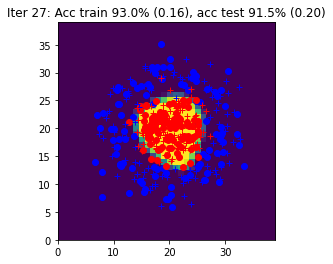

Iter 28: Acc train 96.5% (0.13), acc test 95.0% (0.16)


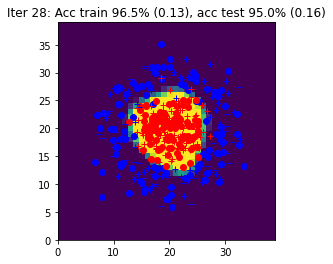

Iter 29: Acc train 96.0% (0.14), acc test 93.0% (0.18)


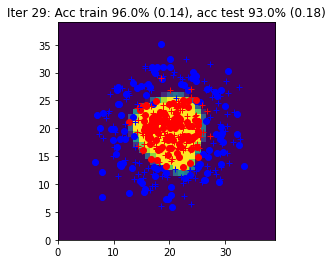

Iter 30: Acc train 96.0% (0.13), acc test 93.0% (0.16)


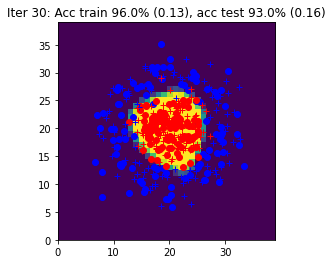

Iter 31: Acc train 96.5% (0.13), acc test 93.0% (0.15)


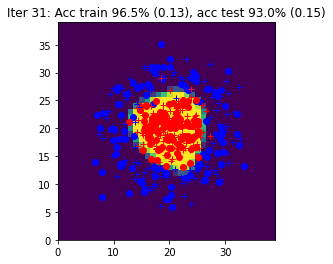

Iter 32: Acc train 95.5% (0.12), acc test 92.5% (0.16)


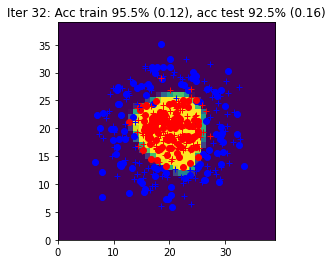

Iter 33: Acc train 94.5% (0.13), acc test 92.5% (0.17)


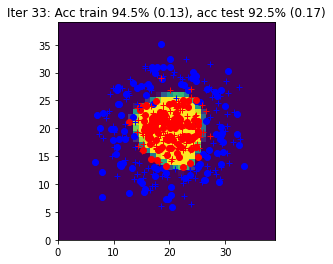

Iter 34: Acc train 93.0% (0.14), acc test 93.0% (0.17)


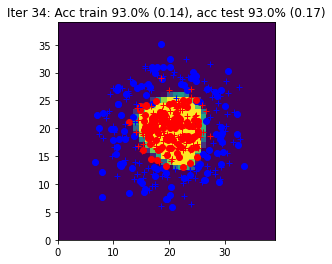

Iter 35: Acc train 97.0% (0.12), acc test 94.5% (0.15)


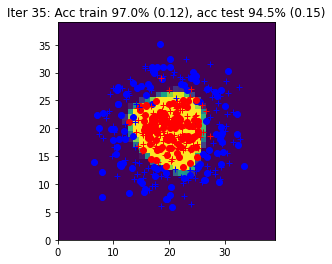

Iter 36: Acc train 94.5% (0.13), acc test 92.0% (0.18)


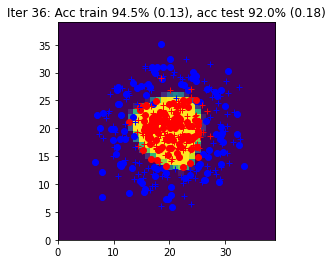

Iter 37: Acc train 97.5% (0.12), acc test 94.0% (0.15)


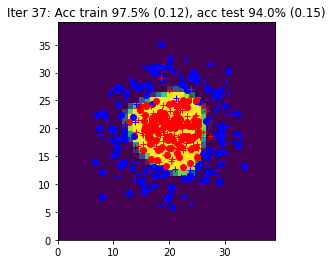

Iter 38: Acc train 96.0% (0.12), acc test 93.0% (0.16)


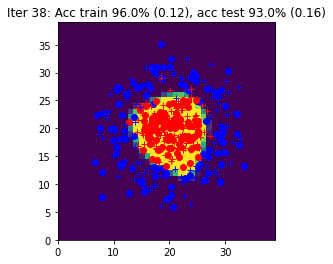

Iter 39: Acc train 95.5% (0.12), acc test 92.5% (0.17)


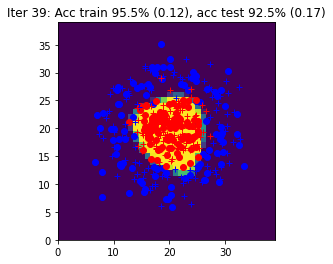

Iter 40: Acc train 97.5% (0.11), acc test 94.0% (0.16)


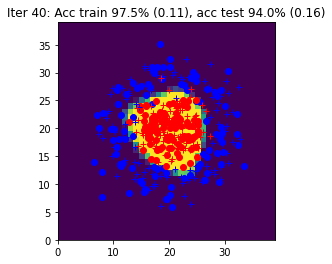

Iter 41: Acc train 97.5% (0.11), acc test 93.5% (0.15)


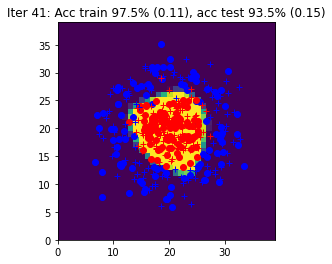

Iter 42: Acc train 95.5% (0.12), acc test 91.5% (0.19)


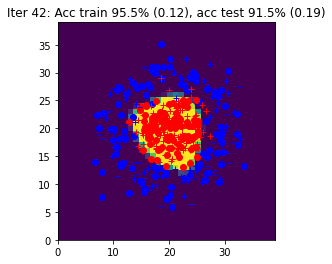

Iter 43: Acc train 96.5% (0.11), acc test 93.0% (0.18)


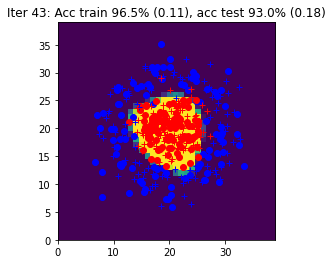

Iter 44: Acc train 97.0% (0.11), acc test 93.0% (0.16)


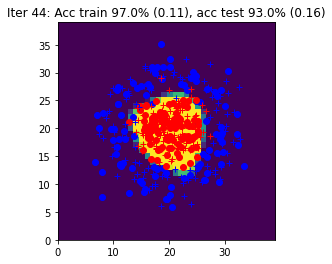

Iter 45: Acc train 96.5% (0.11), acc test 94.0% (0.16)


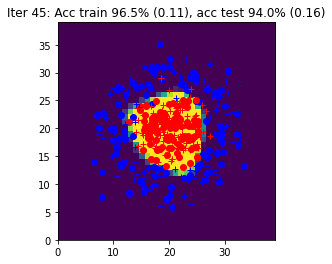

Iter 46: Acc train 97.5% (0.11), acc test 94.5% (0.16)


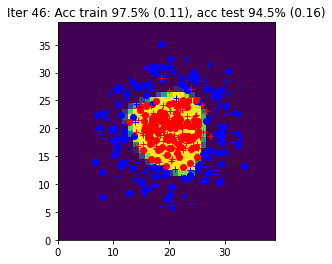

Iter 47: Acc train 97.5% (0.11), acc test 94.0% (0.16)


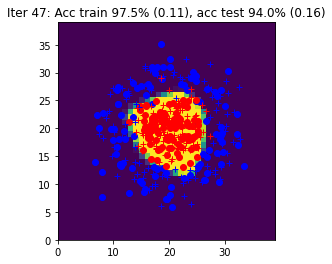

Iter 48: Acc train 97.0% (0.10), acc test 93.0% (0.17)


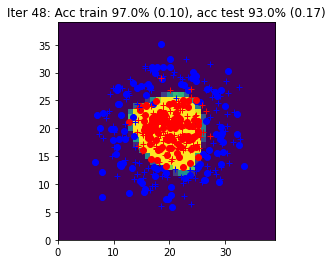

Iter 49: Acc train 97.0% (0.11), acc test 94.0% (0.15)


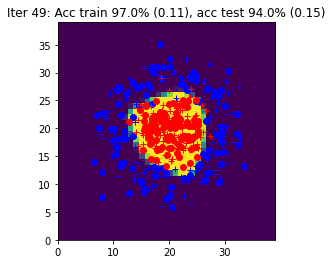

Iter 50: Acc train 93.5% (0.14), acc test 91.5% (0.22)


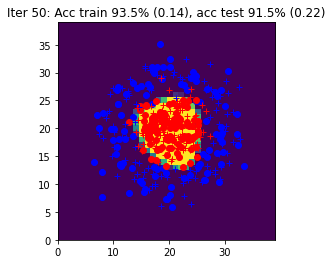

Iter 51: Acc train 96.5% (0.10), acc test 92.5% (0.16)


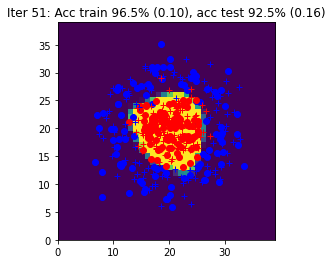

Iter 52: Acc train 96.0% (0.10), acc test 93.0% (0.18)


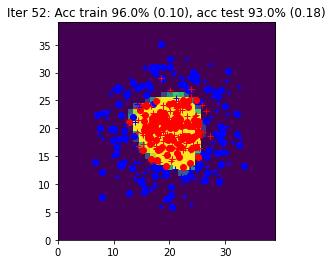

Iter 53: Acc train 94.5% (0.11), acc test 93.0% (0.18)


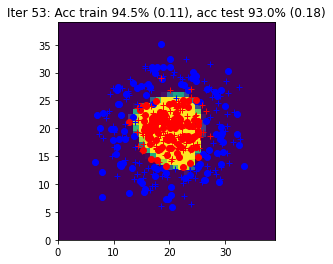

Iter 54: Acc train 95.5% (0.10), acc test 92.5% (0.16)


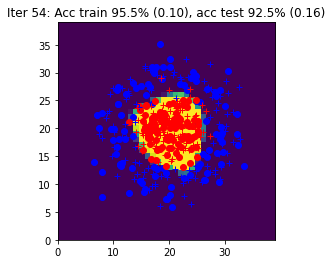

Iter 55: Acc train 92.5% (0.15), acc test 91.5% (0.24)


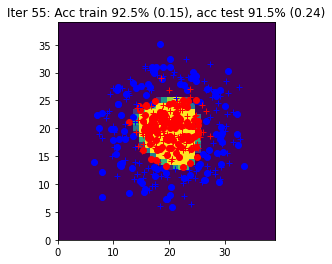

Iter 56: Acc train 93.5% (0.14), acc test 93.0% (0.17)


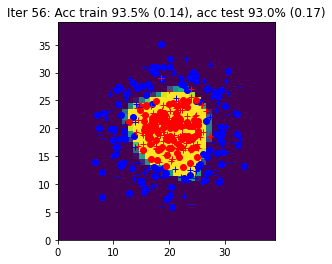

Iter 57: Acc train 97.0% (0.10), acc test 92.5% (0.16)


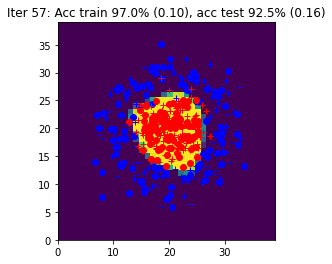

Iter 58: Acc train 95.0% (0.12), acc test 91.5% (0.19)


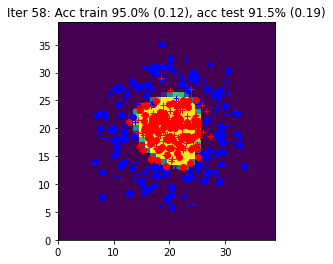

Iter 59: Acc train 97.5% (0.10), acc test 94.0% (0.15)


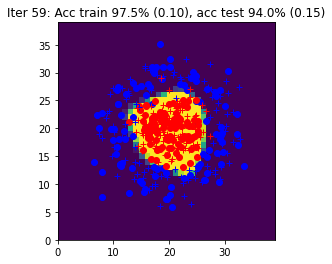

Iter 60: Acc train 97.5% (0.10), acc test 94.0% (0.15)


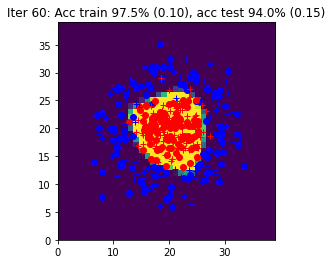

Iter 61: Acc train 96.5% (0.10), acc test 93.0% (0.17)


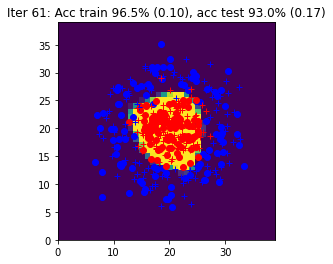

Iter 62: Acc train 97.0% (0.09), acc test 94.0% (0.16)


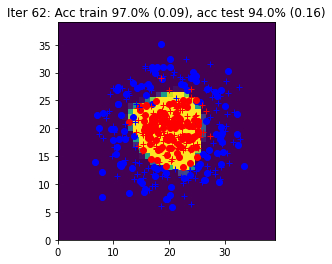

Iter 63: Acc train 98.0% (0.09), acc test 93.0% (0.16)


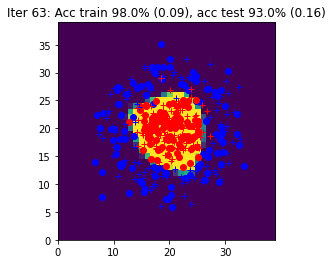

Iter 64: Acc train 97.0% (0.10), acc test 93.0% (0.17)


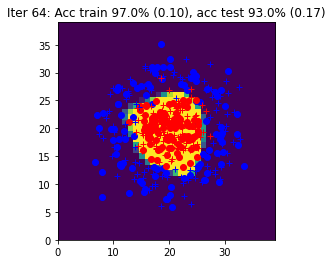

Iter 65: Acc train 96.5% (0.10), acc test 93.0% (0.18)


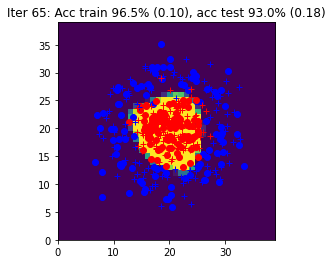

Iter 66: Acc train 96.5% (0.10), acc test 92.5% (0.18)


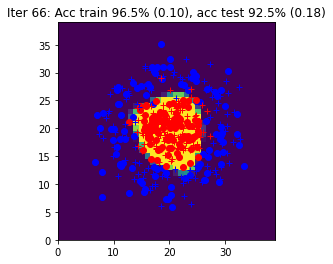

Iter 67: Acc train 94.0% (0.10), acc test 93.0% (0.18)


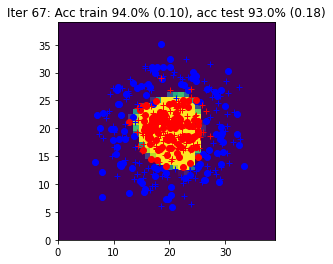

Iter 68: Acc train 97.5% (0.10), acc test 93.5% (0.15)


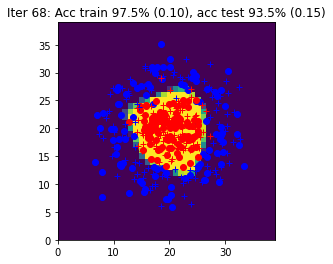

Iter 69: Acc train 95.0% (0.10), acc test 93.0% (0.17)


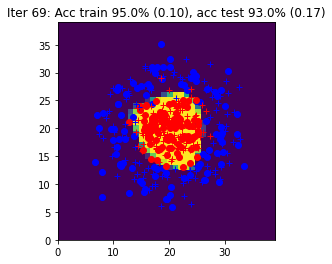

Iter 70: Acc train 97.5% (0.09), acc test 94.0% (0.15)


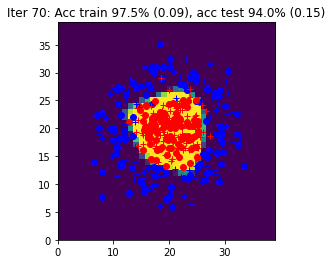

Iter 71: Acc train 95.5% (0.10), acc test 92.0% (0.19)


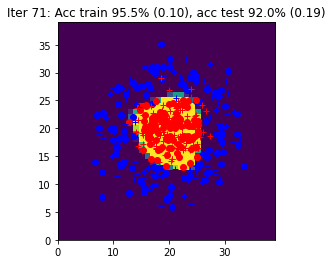

Iter 72: Acc train 97.5% (0.09), acc test 93.0% (0.17)


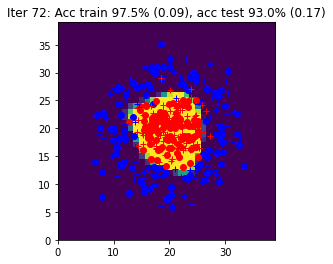

Iter 73: Acc train 97.5% (0.09), acc test 93.5% (0.16)


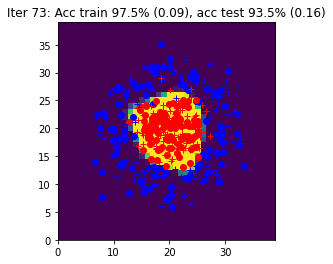

Iter 74: Acc train 97.0% (0.09), acc test 93.5% (0.18)


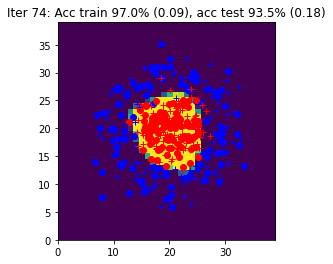

Iter 75: Acc train 95.0% (0.10), acc test 93.0% (0.18)


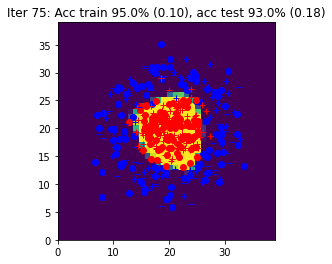

Iter 76: Acc train 97.0% (0.09), acc test 92.5% (0.17)


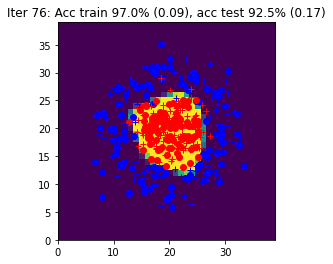

Iter 77: Acc train 98.0% (0.09), acc test 93.5% (0.16)


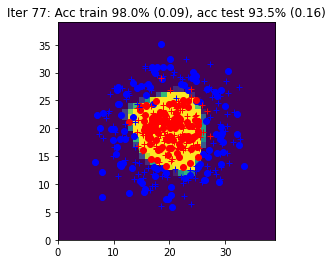

Iter 78: Acc train 96.5% (0.09), acc test 92.5% (0.18)


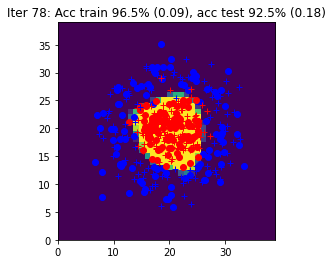

Iter 79: Acc train 97.5% (0.09), acc test 93.0% (0.15)


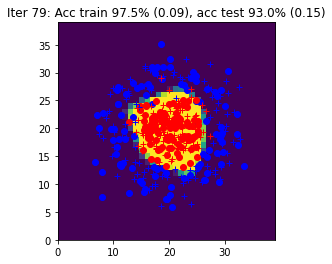

Iter 80: Acc train 96.5% (0.10), acc test 92.5% (0.19)


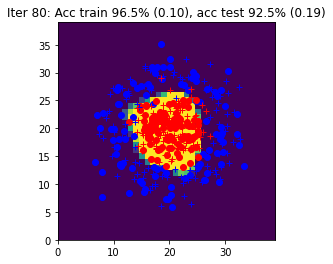

Iter 81: Acc train 97.0% (0.09), acc test 93.0% (0.17)


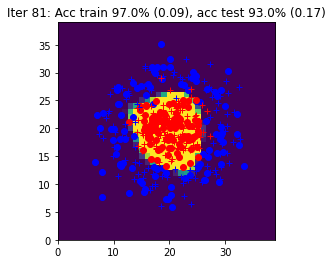

Iter 82: Acc train 97.5% (0.09), acc test 93.5% (0.15)


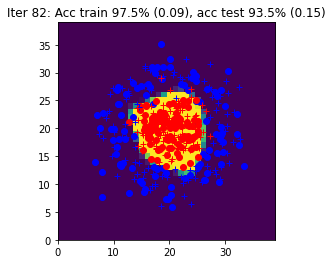

Iter 83: Acc train 97.5% (0.09), acc test 93.5% (0.15)


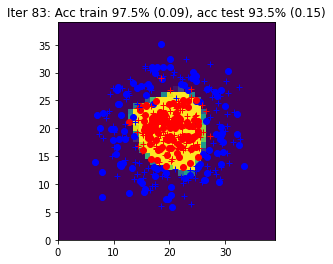

Iter 84: Acc train 97.0% (0.10), acc test 93.5% (0.18)


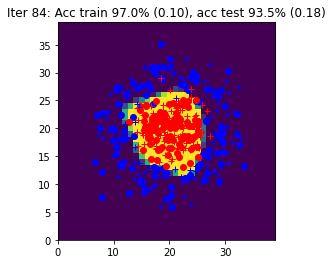

Iter 85: Acc train 97.0% (0.09), acc test 92.5% (0.18)


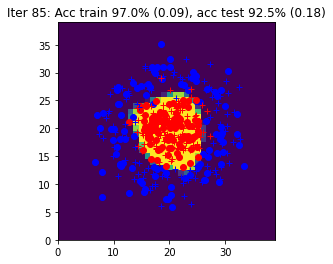

Iter 86: Acc train 97.5% (0.10), acc test 93.5% (0.17)


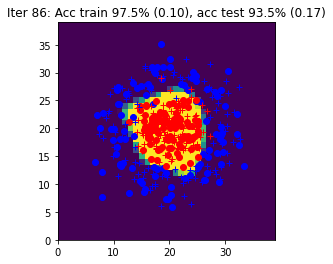

Iter 87: Acc train 97.0% (0.09), acc test 93.5% (0.17)


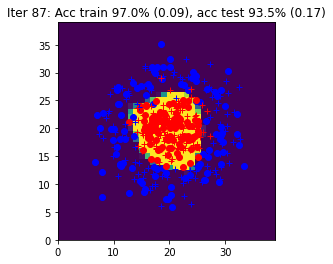

Iter 88: Acc train 98.0% (0.09), acc test 93.5% (0.16)


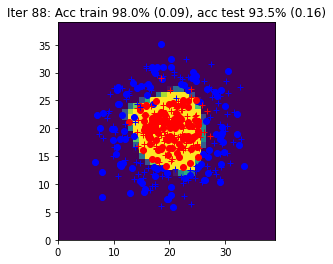

Iter 89: Acc train 96.0% (0.11), acc test 93.0% (0.17)


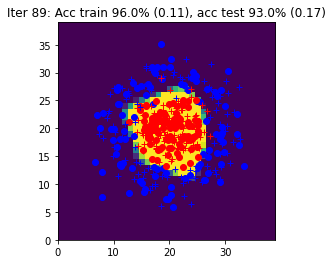

Iter 90: Acc train 97.5% (0.08), acc test 93.0% (0.17)


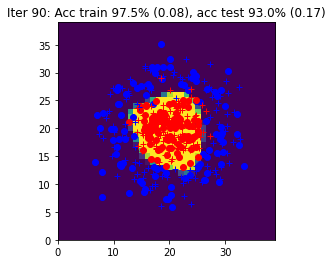

Iter 91: Acc train 97.5% (0.08), acc test 93.0% (0.18)


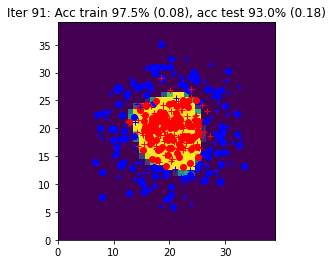

Iter 92: Acc train 97.5% (0.09), acc test 93.5% (0.15)


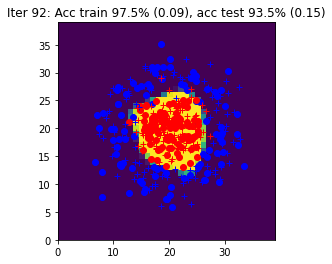

Iter 93: Acc train 97.0% (0.09), acc test 93.5% (0.18)


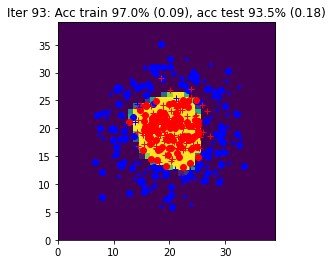

Iter 94: Acc train 97.0% (0.10), acc test 94.0% (0.15)


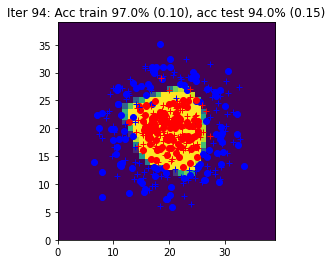

Iter 95: Acc train 96.0% (0.09), acc test 94.5% (0.17)


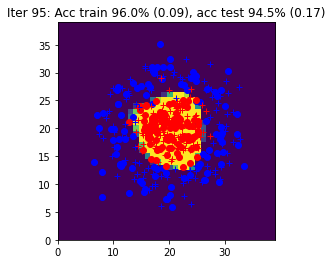

Iter 96: Acc train 97.5% (0.09), acc test 94.0% (0.17)


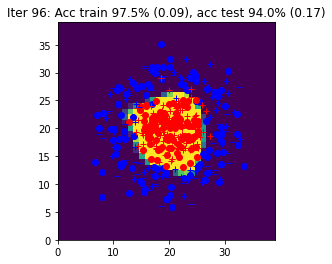

Iter 97: Acc train 97.5% (0.08), acc test 94.0% (0.16)


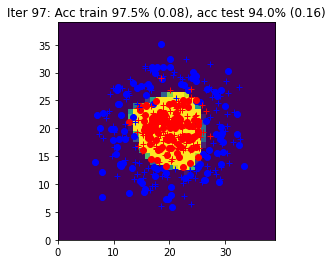

Iter 98: Acc train 97.5% (0.09), acc test 93.5% (0.17)


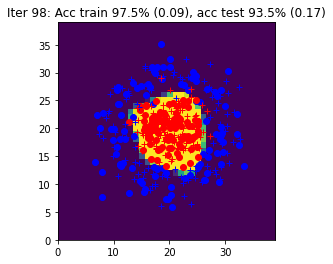

Iter 99: Acc train 97.5% (0.08), acc test 93.5% (0.16)


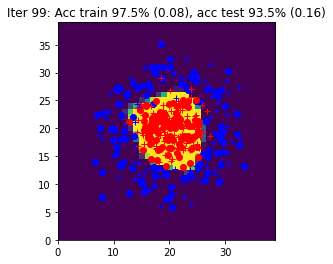

Iter 100: Acc train 97.0% (0.09), acc test 93.0% (0.17)


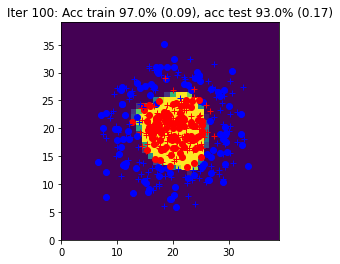

Iter 101: Acc train 98.0% (0.08), acc test 94.0% (0.17)


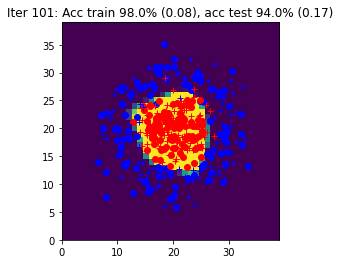

Iter 102: Acc train 98.0% (0.08), acc test 93.0% (0.17)


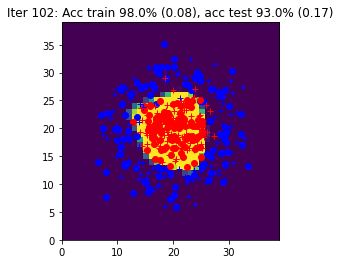

Iter 103: Acc train 97.0% (0.08), acc test 93.0% (0.19)


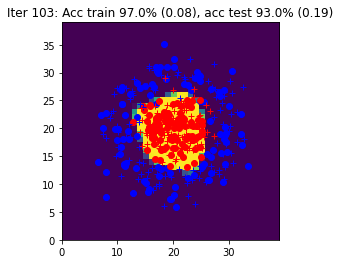

Iter 104: Acc train 97.5% (0.09), acc test 94.5% (0.14)


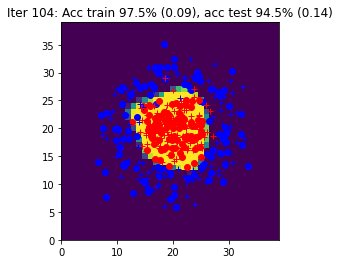

Iter 105: Acc train 97.5% (0.08), acc test 94.0% (0.16)


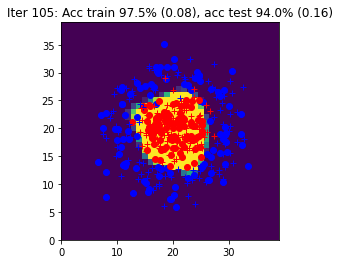

Iter 106: Acc train 97.5% (0.09), acc test 94.5% (0.15)


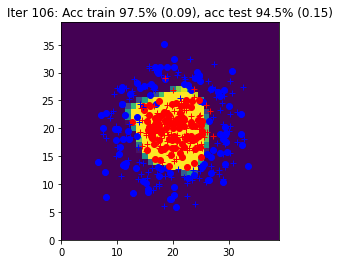

Iter 107: Acc train 96.0% (0.10), acc test 92.5% (0.22)


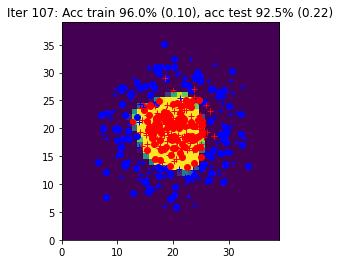

Iter 108: Acc train 97.0% (0.10), acc test 93.5% (0.16)


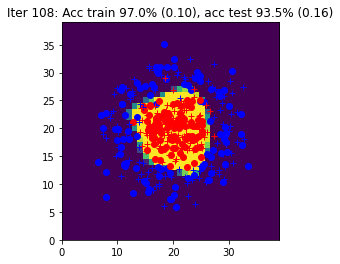

Iter 109: Acc train 97.5% (0.08), acc test 93.0% (0.18)


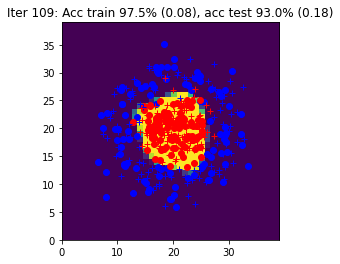

Iter 110: Acc train 96.5% (0.09), acc test 92.5% (0.21)


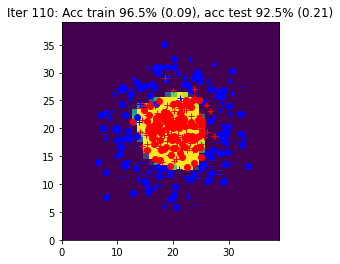

Iter 111: Acc train 96.5% (0.09), acc test 93.5% (0.19)


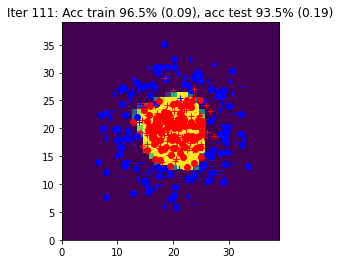

Iter 112: Acc train 97.5% (0.08), acc test 93.5% (0.16)


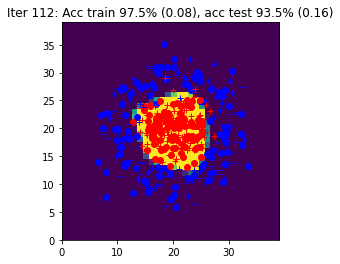

Iter 113: Acc train 96.0% (0.09), acc test 93.5% (0.18)


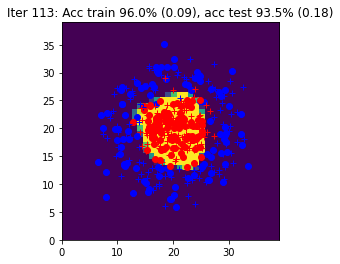

Iter 114: Acc train 93.5% (0.12), acc test 93.0% (0.17)


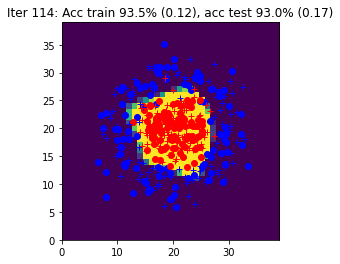

Iter 115: Acc train 97.5% (0.08), acc test 93.5% (0.16)


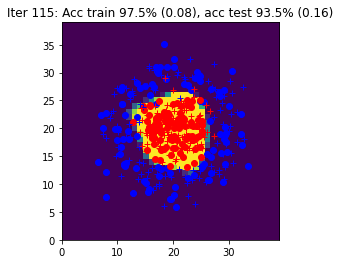

Iter 116: Acc train 97.0% (0.08), acc test 94.0% (0.16)


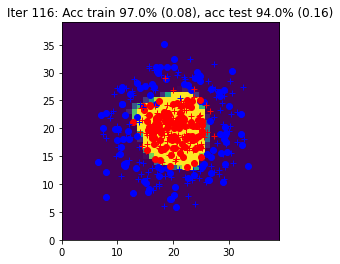

Iter 117: Acc train 98.0% (0.08), acc test 93.0% (0.18)


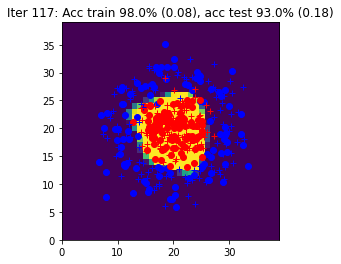

Iter 118: Acc train 96.5% (0.08), acc test 92.5% (0.19)


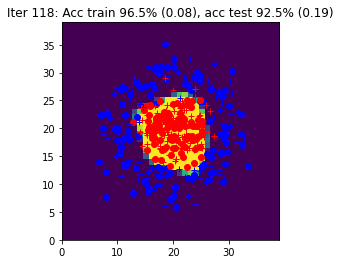

Iter 119: Acc train 97.5% (0.08), acc test 94.0% (0.17)


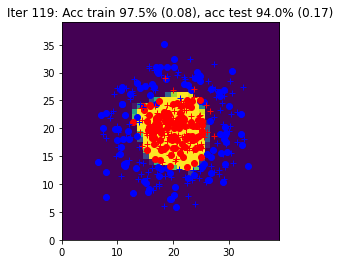

Iter 120: Acc train 97.0% (0.10), acc test 93.5% (0.14)


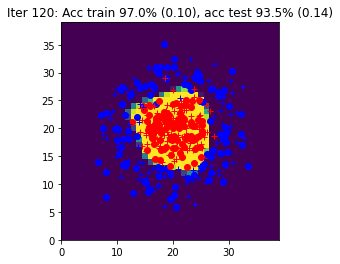

Iter 121: Acc train 97.5% (0.08), acc test 93.5% (0.17)


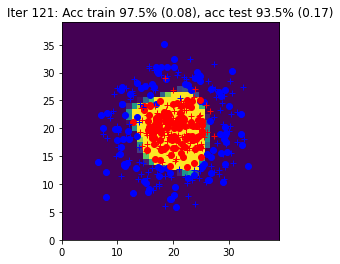

Iter 122: Acc train 98.0% (0.08), acc test 94.0% (0.16)


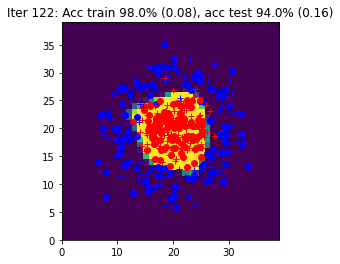

Iter 123: Acc train 97.5% (0.08), acc test 93.5% (0.17)


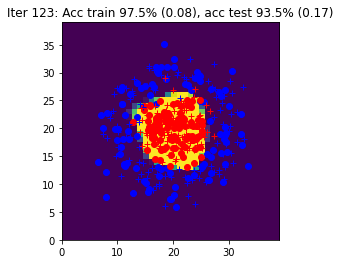

Iter 124: Acc train 97.0% (0.08), acc test 94.0% (0.17)


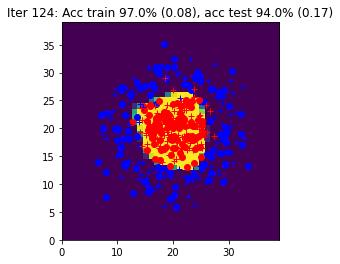

Iter 125: Acc train 98.0% (0.08), acc test 93.5% (0.19)


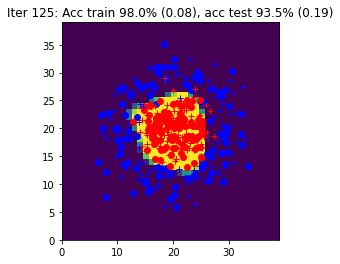

Iter 126: Acc train 97.0% (0.08), acc test 93.0% (0.19)


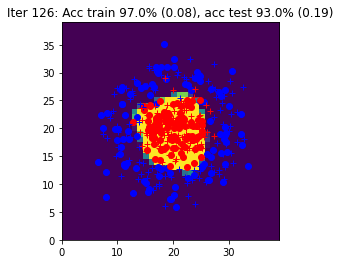

Iter 127: Acc train 97.0% (0.09), acc test 93.5% (0.17)


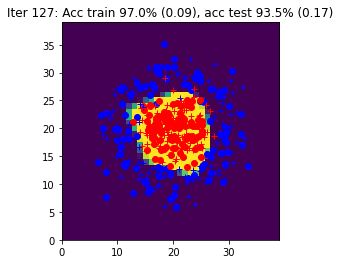

Iter 128: Acc train 96.5% (0.09), acc test 93.0% (0.18)


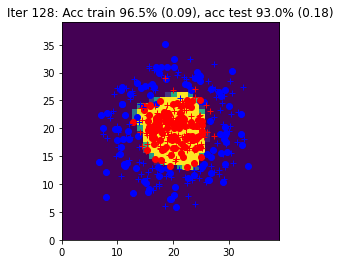

Iter 129: Acc train 98.0% (0.08), acc test 93.5% (0.16)


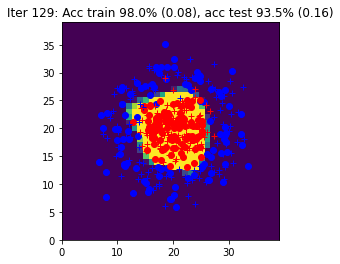

Iter 130: Acc train 97.5% (0.08), acc test 93.0% (0.18)


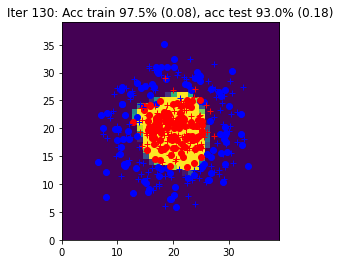

Iter 131: Acc train 97.0% (0.08), acc test 94.5% (0.15)


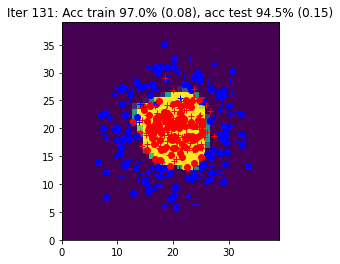

Iter 132: Acc train 97.5% (0.07), acc test 93.5% (0.17)


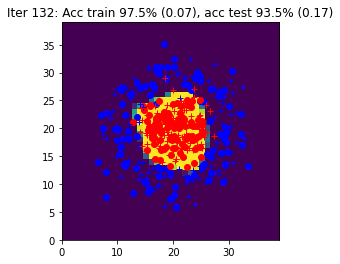

Iter 133: Acc train 98.0% (0.08), acc test 93.5% (0.16)


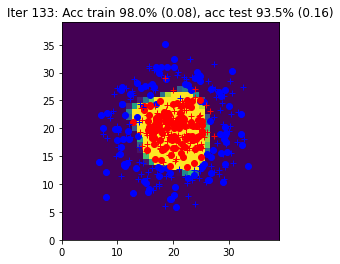

Iter 134: Acc train 96.5% (0.09), acc test 93.5% (0.20)


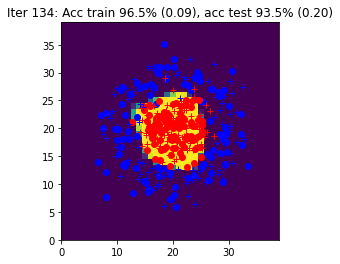

Iter 135: Acc train 97.5% (0.08), acc test 93.5% (0.15)


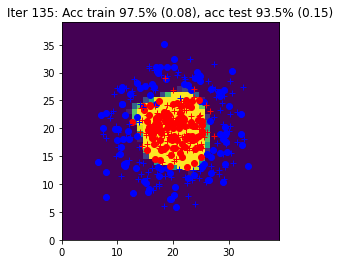

Iter 136: Acc train 97.5% (0.07), acc test 93.0% (0.17)


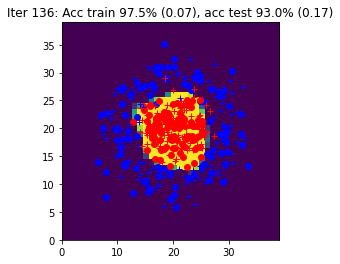

Iter 137: Acc train 97.0% (0.08), acc test 94.0% (0.19)


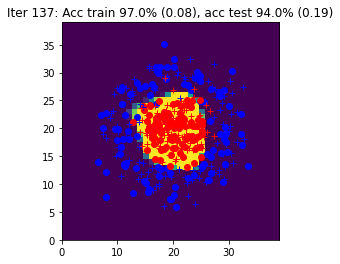

Iter 138: Acc train 95.5% (0.09), acc test 92.5% (0.22)


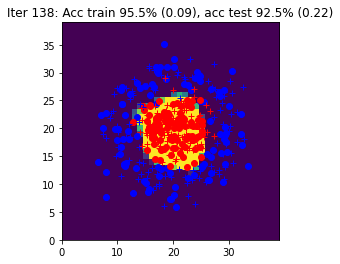

Iter 139: Acc train 97.5% (0.08), acc test 93.5% (0.20)


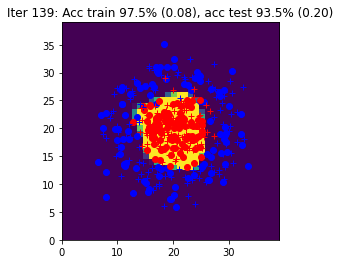

Iter 140: Acc train 98.0% (0.08), acc test 93.0% (0.18)


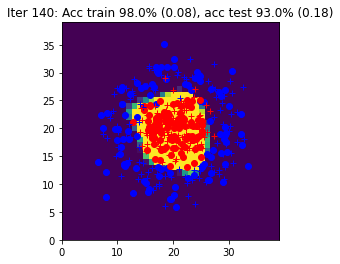

Iter 141: Acc train 98.0% (0.08), acc test 93.5% (0.20)


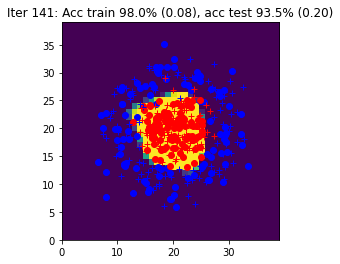

Iter 142: Acc train 97.5% (0.08), acc test 94.0% (0.21)


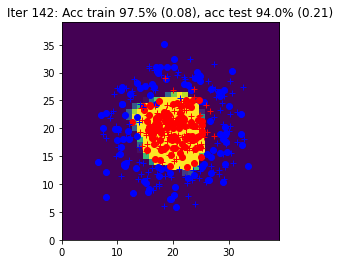

Iter 143: Acc train 97.0% (0.08), acc test 94.0% (0.19)


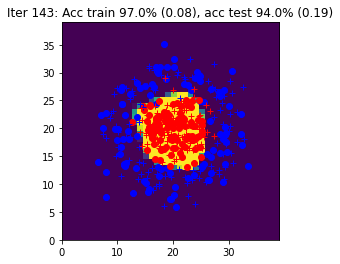

Iter 144: Acc train 96.5% (0.09), acc test 93.0% (0.21)


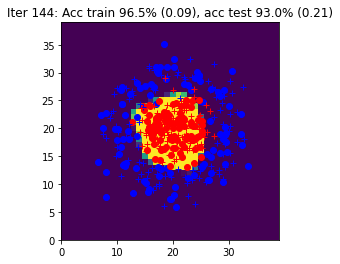

Iter 145: Acc train 97.5% (0.07), acc test 93.5% (0.16)


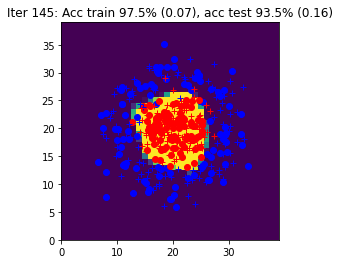

Iter 146: Acc train 97.0% (0.08), acc test 93.0% (0.19)


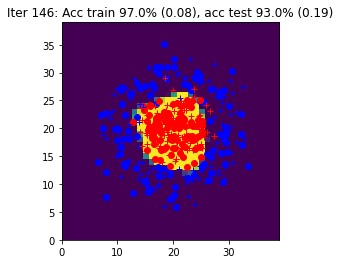

Iter 147: Acc train 97.5% (0.07), acc test 93.5% (0.16)


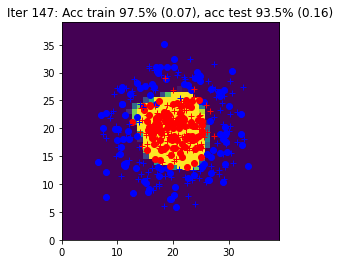

Iter 148: Acc train 97.5% (0.07), acc test 93.5% (0.17)


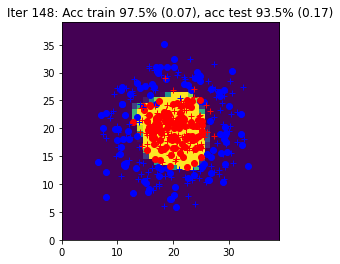

Iter 149: Acc train 98.0% (0.08), acc test 93.0% (0.17)


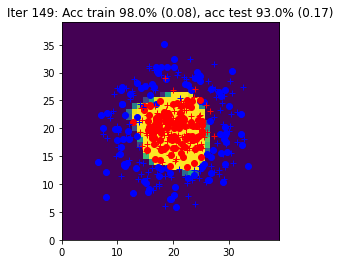

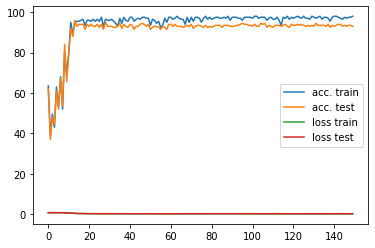

In [ ]:
# init
data = CirclesData()
print(data.Xtrain.shape)
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions forward, loss_accuracy, backward, sgd 
        Yhat, outputs = forward(params, X)
        grads = backward(params, outputs, Y)
        L, acc = loss_accuracy(Yhat, Y)
        params = sgd(params, grads, eta)

    ####################
    ##      FIN        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain.item(), acctest, Ltest.item())
    print(title)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 2 : Simplification du backward avec `torch.autograd`



In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wh, Wy, bh, by
    # activer l'autograd sur les poids du réseau
    
    params["Wh"] = torch.randn(nx, nh, requires_grad=True)
    params["Wy"] = torch.randn(nh, ny, requires_grad=True)
    params["bh"] = torch.zeros(nh, requires_grad=True)
    params["by"] = torch.zeros(ny, requires_grad=True)
    
    ####################
    ##      FIN        #
    ####################
    return params

La fonction `forward` est inchangée par rapport à la partie précédente. 

La fonction `backward` n'est plus utilisée grâce à l'autograd. 

In [ ]:
def sgd(params, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour le contenu de params
    # attention à bien utiliser torch.no_grad()
    # et à remettre les accumulateurs de gradients à zéro
    with torch.no_grad(): 
        params['Wy'] -= eta*params['Wy'].grad
        params['Wy'].grad.zero_() 
        params['Wh'] -= eta*params['Wh'].grad
        params['Wh'].grad.zero_() 
        params['bh'] -= eta*params['bh'].grad
        params['bh'].grad.zero_() 
        params['by'] -= eta*params['by'].grad
        params['by'].grad.zero_() 

    ####################
    ##      FIN        #
    ####################
    return params

## Algorithme global d'apprentissage (avec autograd)

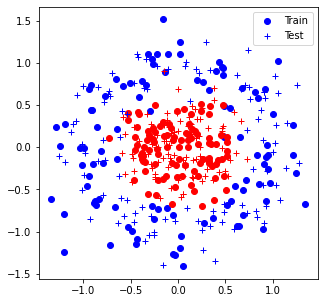

Iter 0: Acc train 58.5% (0.71), acc test 59.0% (0.73)


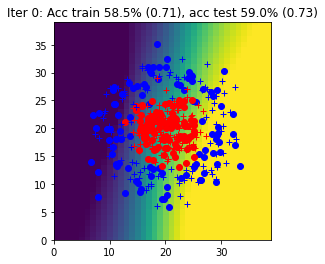

Iter 1: Acc train 68.5% (0.68), acc test 65.5% (0.69)


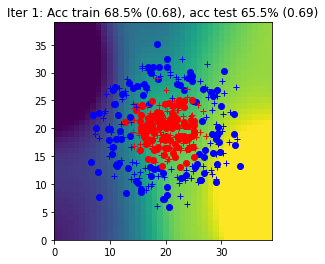

Iter 2: Acc train 68.5% (0.67), acc test 65.5% (0.67)


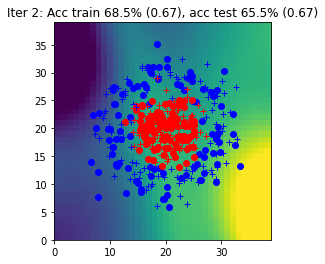

Iter 3: Acc train 66.0% (0.66), acc test 63.0% (0.66)


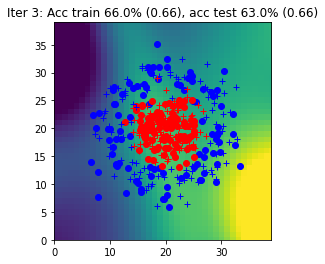

Iter 4: Acc train 73.5% (0.65), acc test 72.5% (0.66)


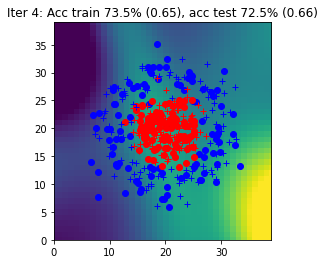

Iter 5: Acc train 66.5% (0.64), acc test 63.0% (0.64)


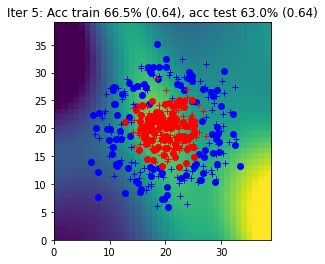

Iter 6: Acc train 74.0% (0.63), acc test 73.5% (0.63)


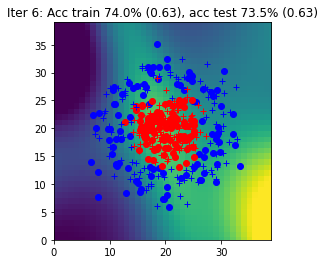

Iter 7: Acc train 69.0% (0.62), acc test 68.0% (0.63)


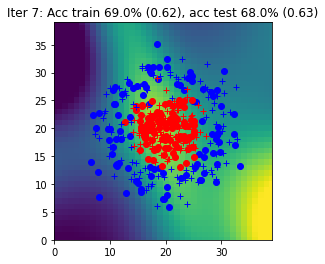

Iter 8: Acc train 80.5% (0.61), acc test 79.0% (0.62)


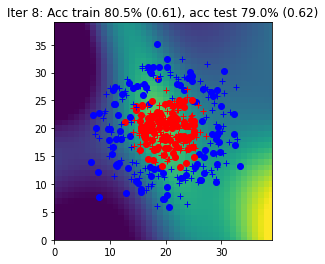

Iter 9: Acc train 82.0% (0.60), acc test 78.0% (0.61)


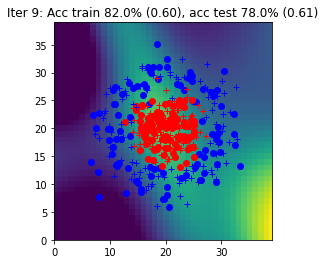

Iter 10: Acc train 84.0% (0.59), acc test 80.5% (0.60)


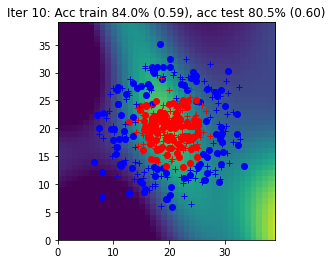

Iter 11: Acc train 83.0% (0.58), acc test 80.0% (0.59)


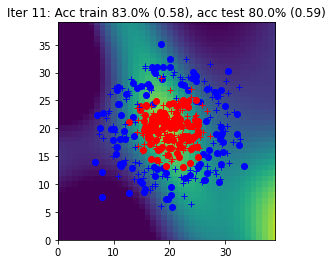

Iter 12: Acc train 81.5% (0.57), acc test 80.0% (0.58)


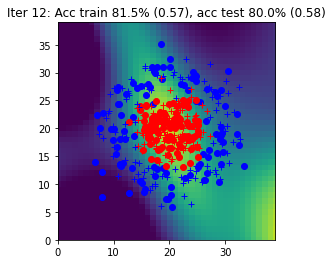

Iter 13: Acc train 84.0% (0.56), acc test 80.5% (0.57)


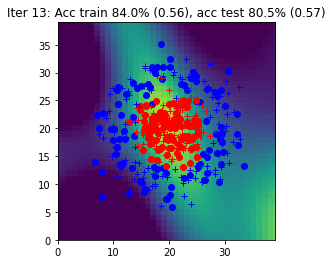

Iter 14: Acc train 84.5% (0.55), acc test 82.0% (0.55)


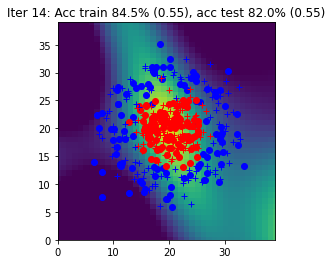

Iter 15: Acc train 83.0% (0.54), acc test 80.5% (0.54)


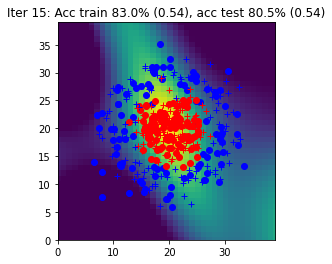

Iter 16: Acc train 83.0% (0.53), acc test 81.0% (0.54)


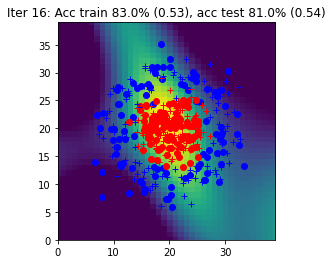

Iter 17: Acc train 85.0% (0.52), acc test 82.5% (0.52)


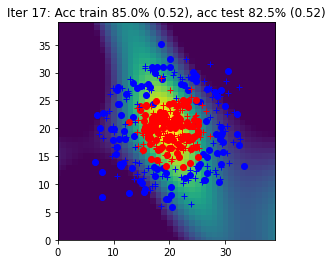

Iter 18: Acc train 86.0% (0.51), acc test 82.5% (0.52)


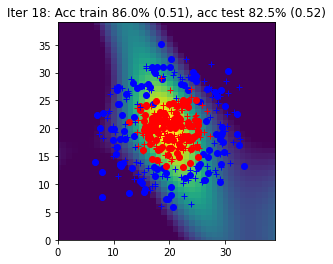

Iter 19: Acc train 85.5% (0.50), acc test 83.0% (0.51)


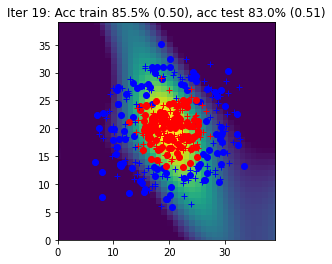

Iter 20: Acc train 86.0% (0.49), acc test 82.5% (0.50)


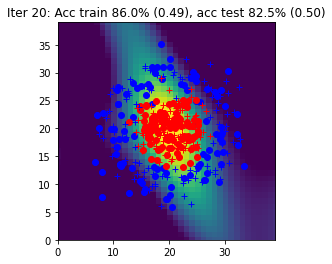

Iter 21: Acc train 86.0% (0.48), acc test 84.0% (0.49)


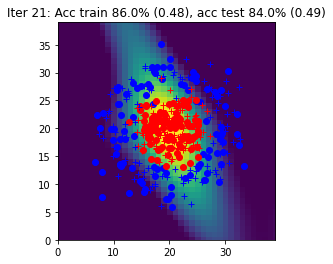

Iter 22: Acc train 84.5% (0.47), acc test 83.0% (0.48)


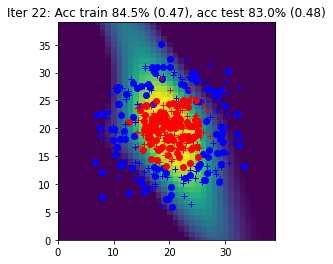

Iter 23: Acc train 86.0% (0.46), acc test 84.5% (0.47)


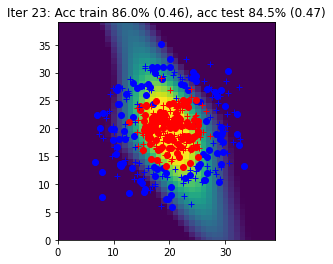

Iter 24: Acc train 88.0% (0.45), acc test 85.0% (0.46)


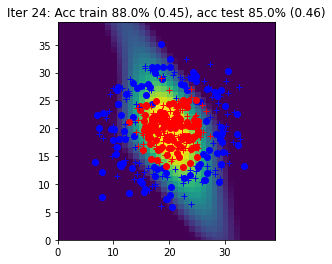

Iter 25: Acc train 88.0% (0.44), acc test 85.5% (0.45)


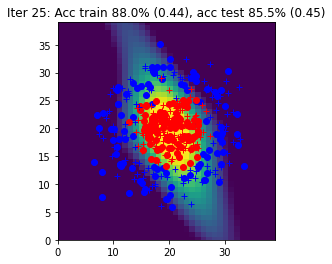

Iter 26: Acc train 88.5% (0.43), acc test 86.0% (0.45)


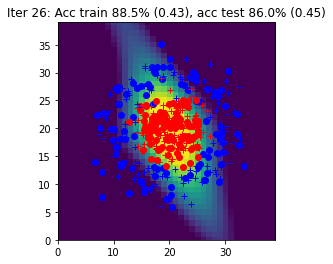

Iter 27: Acc train 90.0% (0.43), acc test 86.5% (0.44)


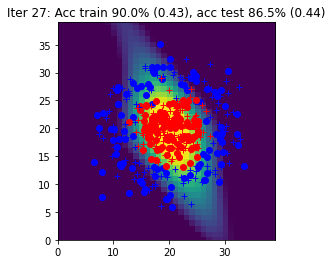

Iter 28: Acc train 89.5% (0.42), acc test 87.5% (0.43)


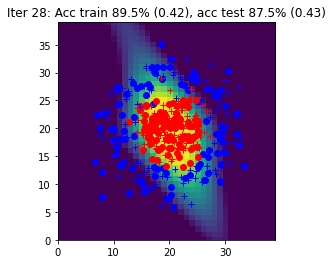

Iter 29: Acc train 88.5% (0.41), acc test 86.5% (0.42)


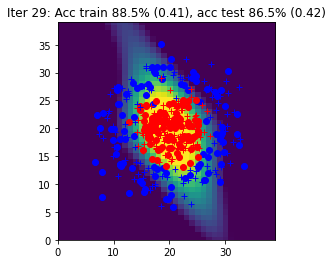

Iter 30: Acc train 90.5% (0.40), acc test 86.5% (0.42)


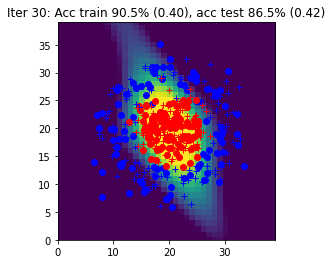

Iter 31: Acc train 90.5% (0.40), acc test 87.5% (0.41)


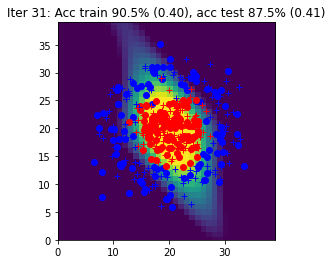

Iter 32: Acc train 90.0% (0.39), acc test 87.0% (0.40)


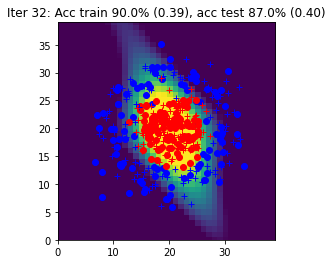

Iter 33: Acc train 91.5% (0.38), acc test 88.5% (0.40)


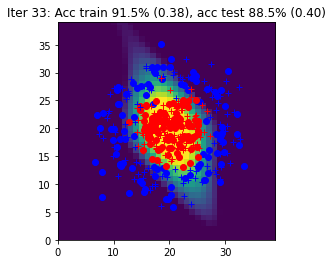

Iter 34: Acc train 91.5% (0.38), acc test 88.5% (0.39)


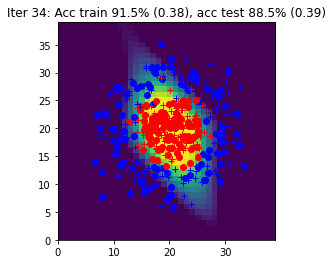

Iter 35: Acc train 91.5% (0.37), acc test 88.5% (0.38)


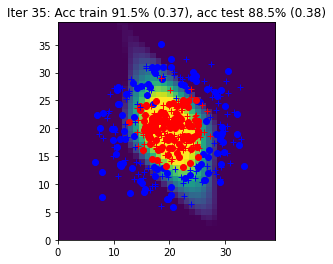

Iter 36: Acc train 92.0% (0.36), acc test 88.5% (0.38)


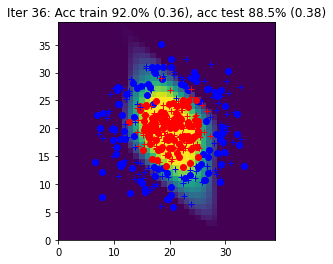

Iter 37: Acc train 92.0% (0.36), acc test 88.5% (0.37)


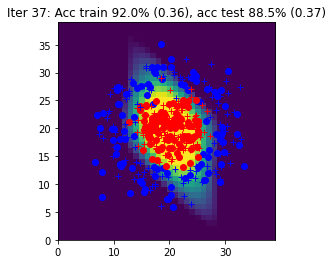

Iter 38: Acc train 92.0% (0.35), acc test 88.5% (0.36)


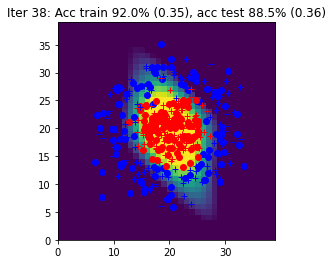

Iter 39: Acc train 92.0% (0.34), acc test 88.5% (0.36)


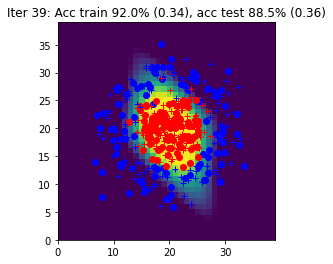

Iter 40: Acc train 92.0% (0.34), acc test 89.5% (0.35)


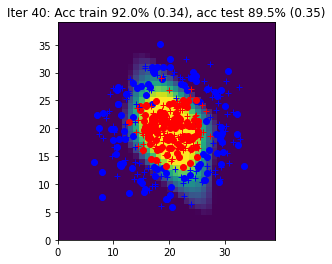

Iter 41: Acc train 92.0% (0.33), acc test 89.0% (0.35)


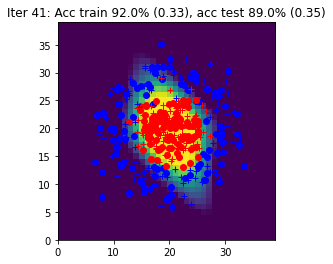

Iter 42: Acc train 92.5% (0.33), acc test 89.5% (0.34)


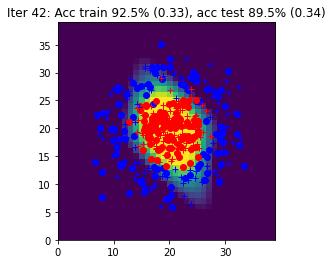

Iter 43: Acc train 93.5% (0.32), acc test 90.0% (0.34)


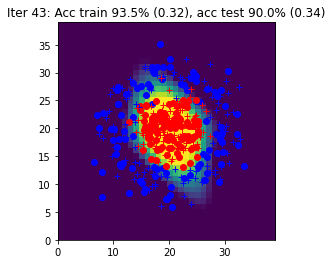

Iter 44: Acc train 92.5% (0.32), acc test 90.0% (0.33)


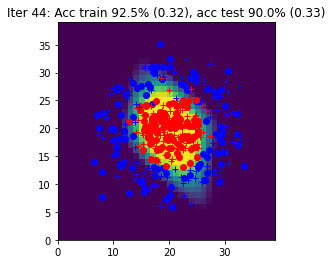

Iter 45: Acc train 93.0% (0.31), acc test 90.0% (0.33)


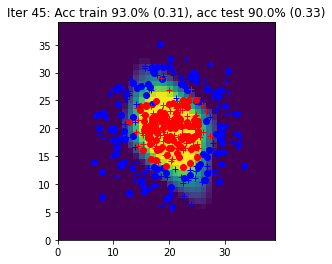

Iter 46: Acc train 93.5% (0.31), acc test 90.5% (0.32)


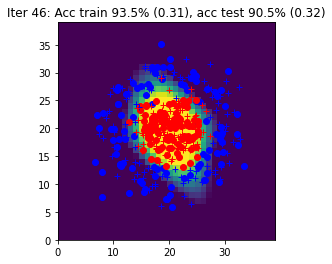

Iter 47: Acc train 93.5% (0.30), acc test 90.0% (0.32)


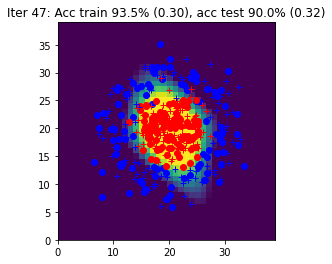

Iter 48: Acc train 94.0% (0.30), acc test 90.5% (0.31)


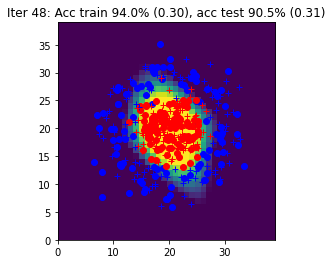

Iter 49: Acc train 94.5% (0.29), acc test 91.0% (0.31)


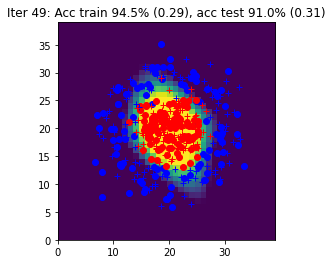

Iter 50: Acc train 93.5% (0.29), acc test 91.0% (0.31)


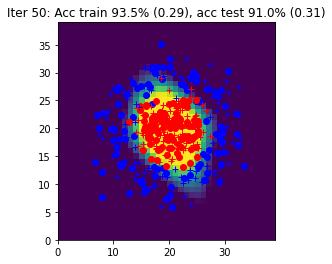

Iter 51: Acc train 95.5% (0.29), acc test 92.0% (0.30)


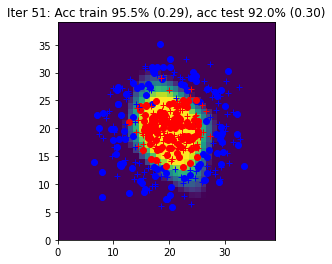

Iter 52: Acc train 94.5% (0.28), acc test 91.0% (0.30)


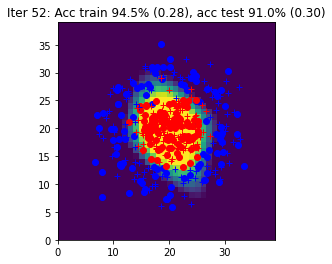

Iter 53: Acc train 97.0% (0.28), acc test 92.5% (0.30)


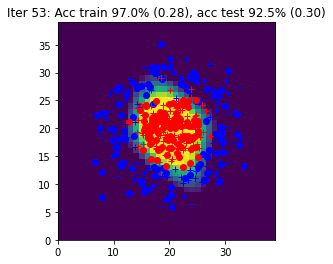

Iter 54: Acc train 96.0% (0.28), acc test 92.5% (0.29)


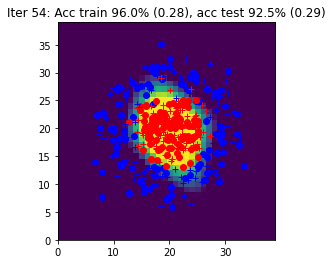

Iter 55: Acc train 96.0% (0.27), acc test 92.5% (0.29)


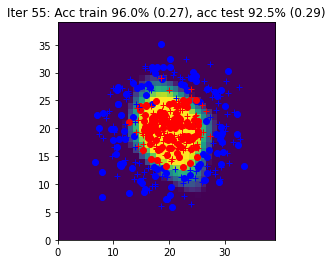

Iter 56: Acc train 96.5% (0.27), acc test 93.0% (0.28)


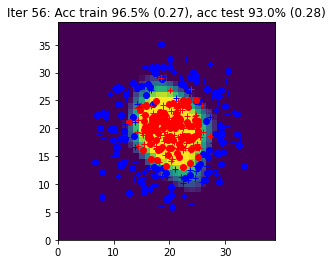

Iter 57: Acc train 96.5% (0.26), acc test 93.0% (0.28)


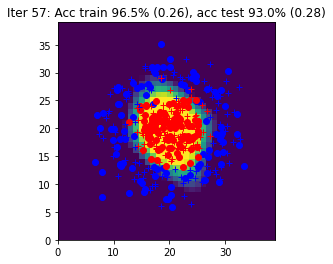

Iter 58: Acc train 96.0% (0.26), acc test 93.0% (0.28)


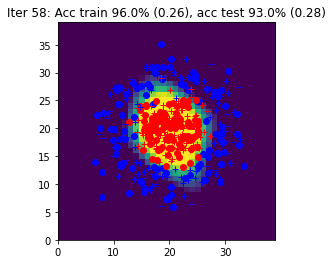

Iter 59: Acc train 96.0% (0.26), acc test 92.5% (0.27)


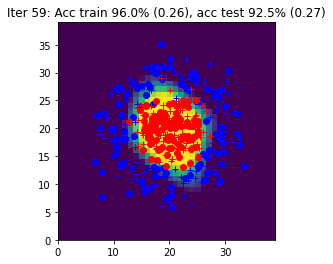

Iter 60: Acc train 96.5% (0.26), acc test 93.5% (0.27)


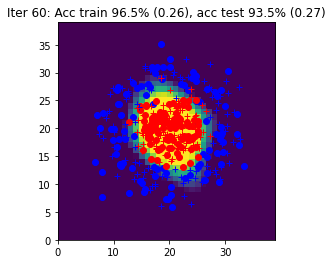

Iter 61: Acc train 96.5% (0.25), acc test 93.5% (0.27)


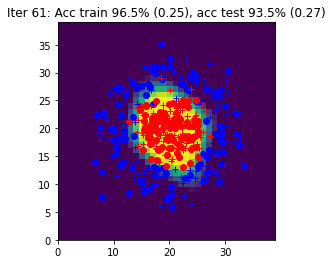

Iter 62: Acc train 96.5% (0.25), acc test 93.5% (0.26)


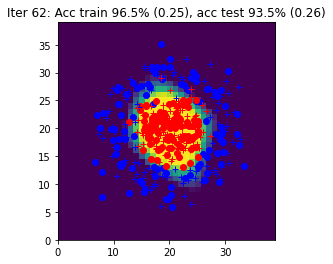

Iter 63: Acc train 96.5% (0.25), acc test 93.5% (0.26)


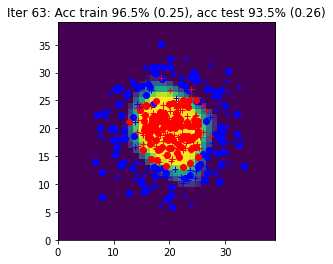

Iter 64: Acc train 95.5% (0.24), acc test 93.5% (0.26)


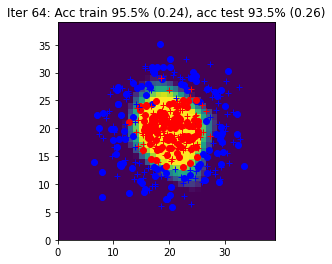

Iter 65: Acc train 97.5% (0.24), acc test 94.5% (0.26)


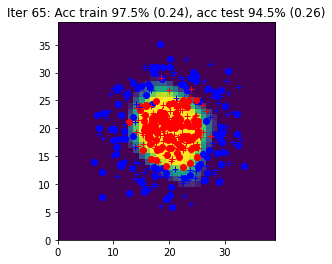

Iter 66: Acc train 96.5% (0.24), acc test 94.5% (0.25)


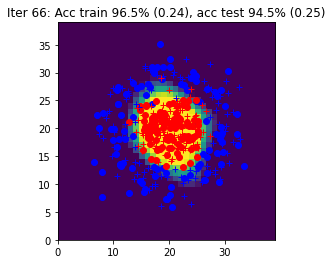

Iter 67: Acc train 95.5% (0.24), acc test 94.5% (0.25)


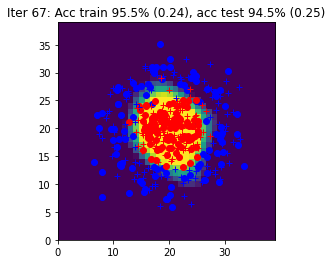

Iter 68: Acc train 96.0% (0.23), acc test 94.5% (0.25)


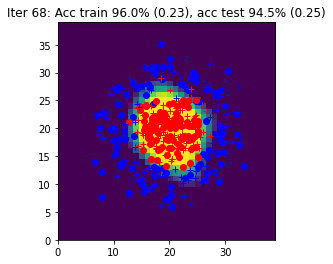

Iter 69: Acc train 96.5% (0.23), acc test 94.5% (0.25)


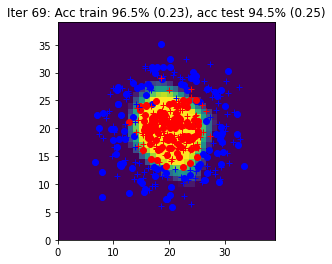

Iter 70: Acc train 95.5% (0.23), acc test 94.5% (0.24)


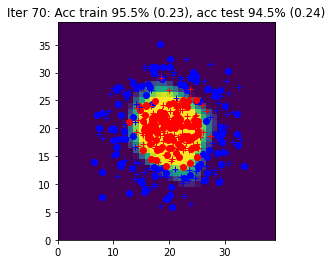

Iter 71: Acc train 96.0% (0.23), acc test 94.5% (0.24)


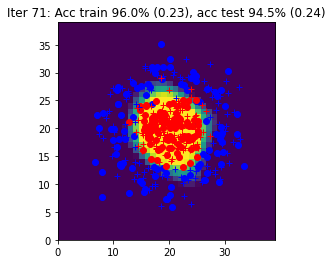

Iter 72: Acc train 95.5% (0.22), acc test 94.5% (0.24)


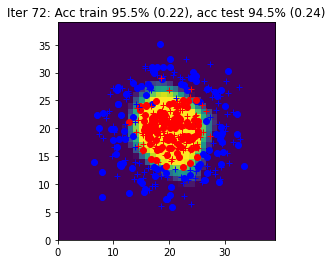

Iter 73: Acc train 96.0% (0.22), acc test 94.5% (0.24)


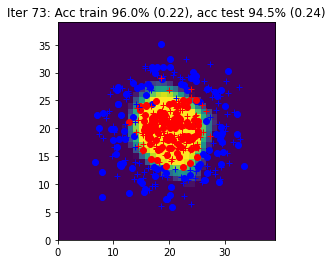

Iter 74: Acc train 96.0% (0.22), acc test 94.5% (0.24)


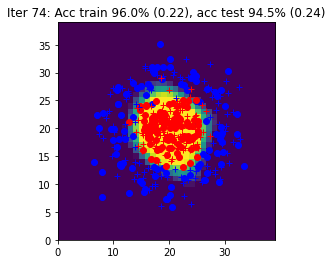

Iter 75: Acc train 96.0% (0.22), acc test 94.5% (0.23)


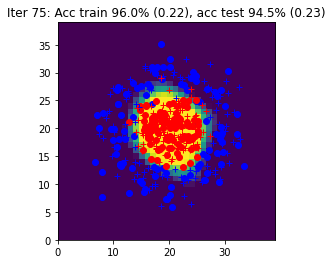

Iter 76: Acc train 96.0% (0.22), acc test 95.0% (0.23)


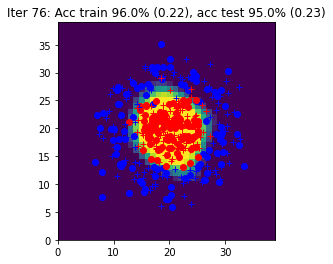

Iter 77: Acc train 96.0% (0.21), acc test 95.0% (0.23)


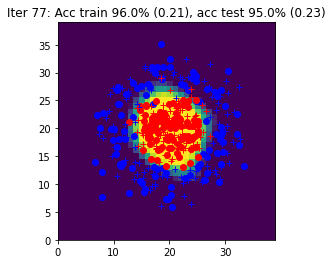

Iter 78: Acc train 96.0% (0.21), acc test 95.0% (0.23)


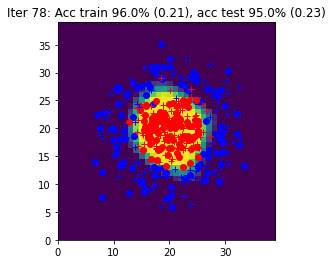

Iter 79: Acc train 96.0% (0.21), acc test 95.0% (0.23)


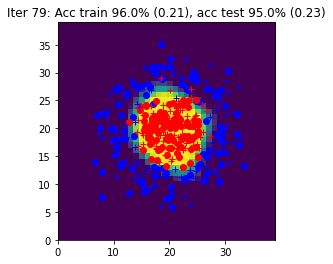

Iter 80: Acc train 96.0% (0.21), acc test 95.0% (0.22)


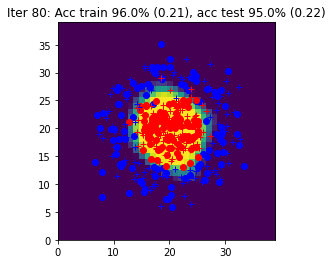

Iter 81: Acc train 96.0% (0.21), acc test 94.5% (0.22)


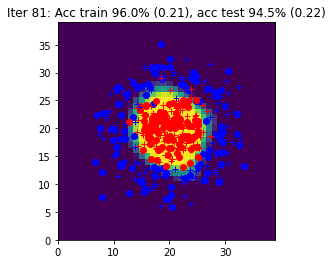

Iter 82: Acc train 96.0% (0.21), acc test 94.5% (0.22)


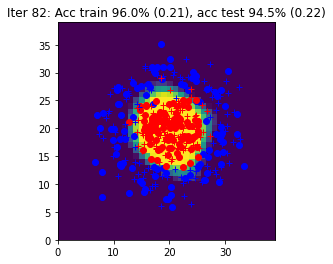

Iter 83: Acc train 96.5% (0.20), acc test 95.0% (0.22)


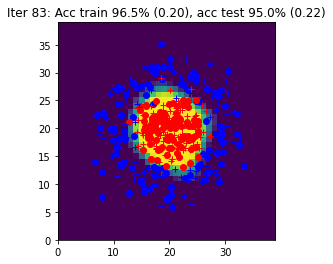

Iter 84: Acc train 96.5% (0.20), acc test 94.5% (0.22)


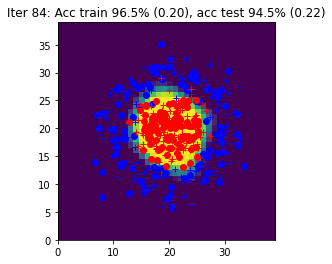

Iter 85: Acc train 96.5% (0.20), acc test 94.5% (0.22)


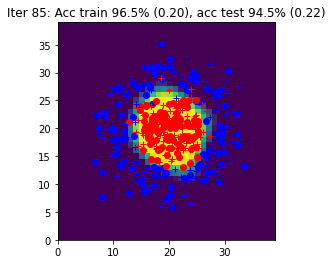

Iter 86: Acc train 96.5% (0.20), acc test 95.0% (0.22)


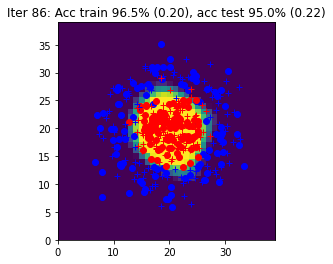

Iter 87: Acc train 96.5% (0.20), acc test 94.5% (0.21)


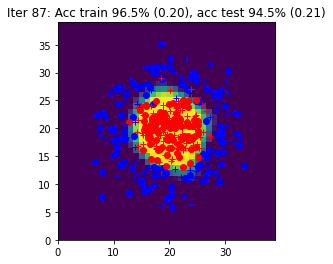

Iter 88: Acc train 96.5% (0.20), acc test 94.5% (0.21)


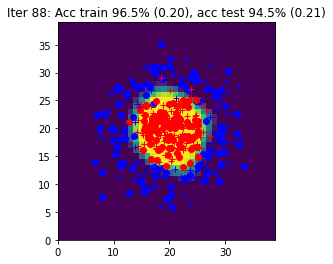

Iter 89: Acc train 97.0% (0.20), acc test 94.5% (0.21)


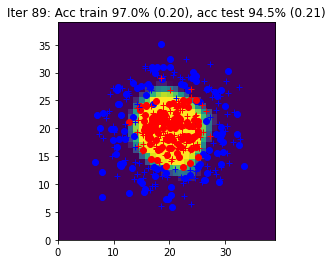

Iter 90: Acc train 96.5% (0.19), acc test 94.5% (0.21)


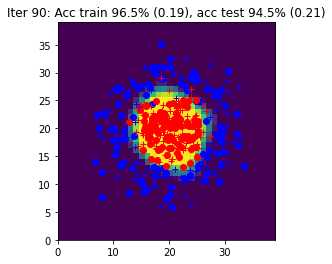

Iter 91: Acc train 97.0% (0.19), acc test 94.5% (0.21)


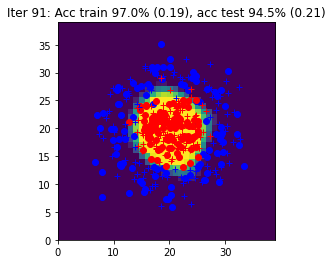

Iter 92: Acc train 97.0% (0.19), acc test 94.5% (0.21)


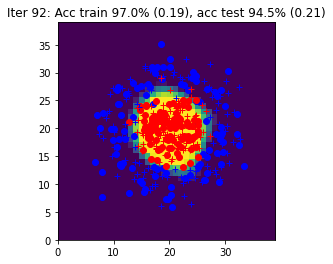

Iter 93: Acc train 97.0% (0.19), acc test 94.5% (0.21)


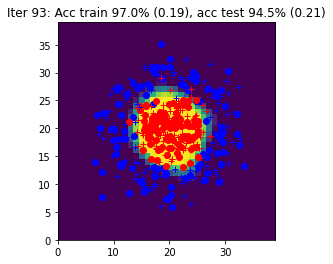

Iter 94: Acc train 96.5% (0.19), acc test 94.5% (0.20)


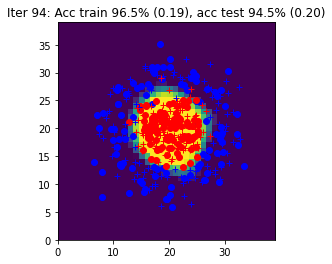

Iter 95: Acc train 96.5% (0.19), acc test 94.0% (0.20)


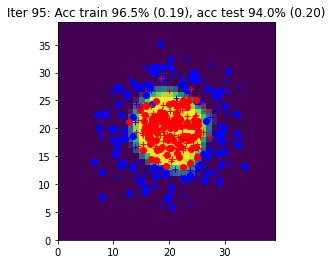

Iter 96: Acc train 96.5% (0.19), acc test 94.5% (0.20)


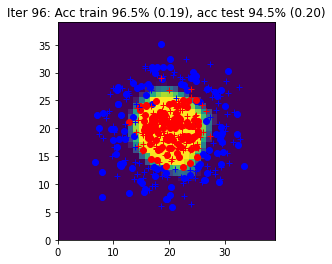

Iter 97: Acc train 96.5% (0.18), acc test 94.5% (0.20)


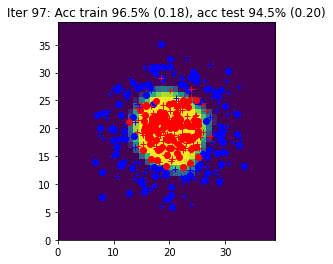

Iter 98: Acc train 96.0% (0.18), acc test 94.5% (0.20)


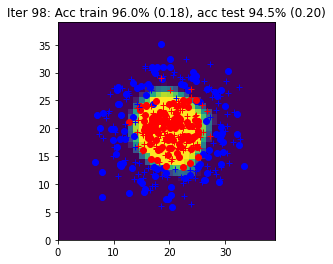

Iter 99: Acc train 96.5% (0.18), acc test 94.5% (0.20)


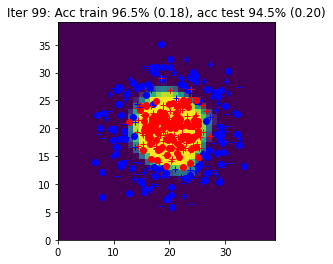

Iter 100: Acc train 96.0% (0.18), acc test 94.5% (0.20)


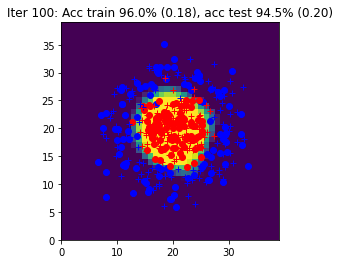

Iter 101: Acc train 96.5% (0.18), acc test 94.5% (0.20)


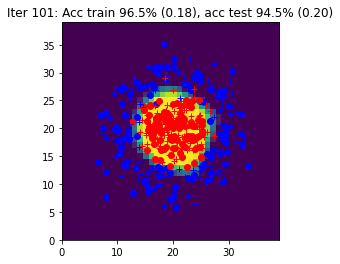

Iter 102: Acc train 96.5% (0.18), acc test 94.5% (0.20)


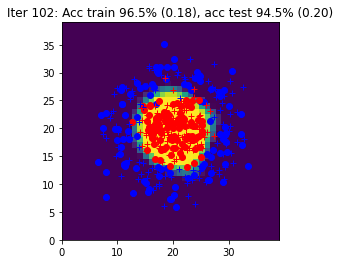

Iter 103: Acc train 96.5% (0.18), acc test 94.5% (0.19)


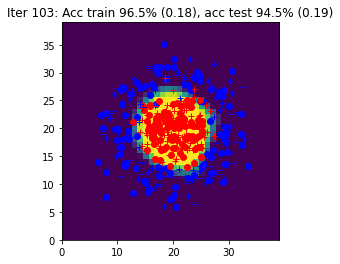

Iter 104: Acc train 96.5% (0.18), acc test 94.5% (0.19)


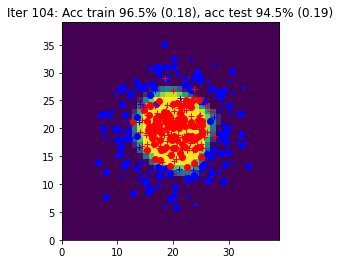

Iter 105: Acc train 96.5% (0.18), acc test 94.0% (0.19)


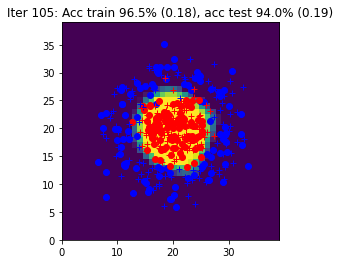

Iter 106: Acc train 96.0% (0.18), acc test 94.5% (0.19)


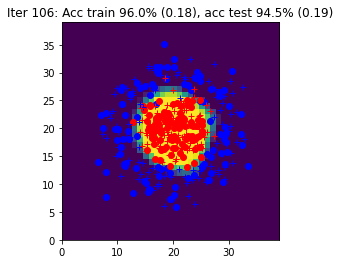

Iter 107: Acc train 96.5% (0.17), acc test 94.0% (0.19)


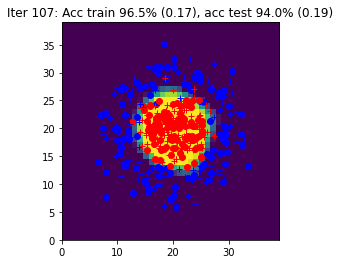

Iter 108: Acc train 96.5% (0.17), acc test 94.5% (0.19)


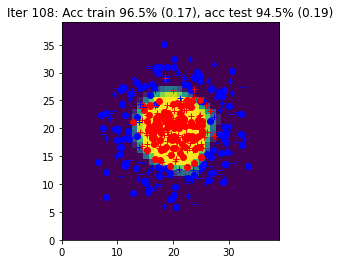

Iter 109: Acc train 96.5% (0.17), acc test 94.5% (0.19)


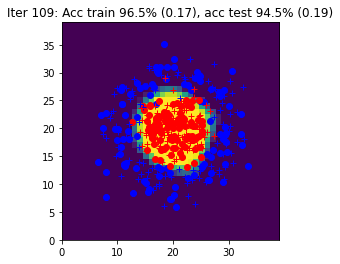

Iter 110: Acc train 96.0% (0.17), acc test 94.5% (0.19)


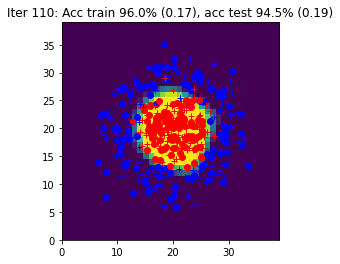

Iter 111: Acc train 96.0% (0.17), acc test 94.5% (0.19)


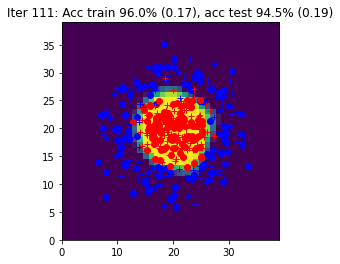

Iter 112: Acc train 96.0% (0.17), acc test 94.5% (0.19)


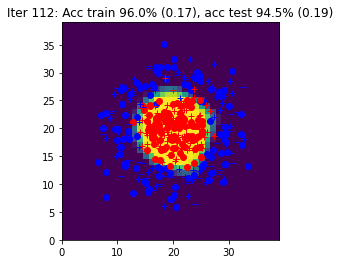

Iter 113: Acc train 96.5% (0.17), acc test 94.5% (0.19)


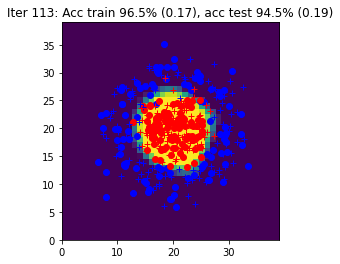

Iter 114: Acc train 96.0% (0.17), acc test 94.0% (0.19)


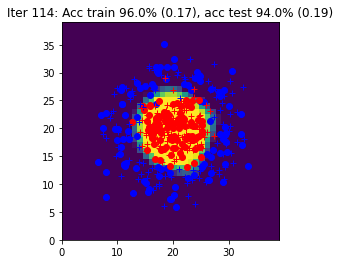

Iter 115: Acc train 96.0% (0.17), acc test 94.5% (0.18)


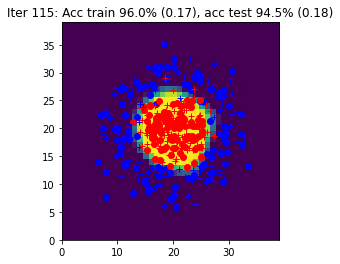

Iter 116: Acc train 96.0% (0.17), acc test 94.5% (0.18)


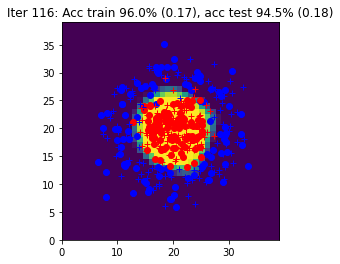

Iter 117: Acc train 96.0% (0.17), acc test 94.5% (0.18)


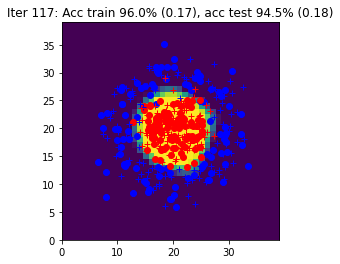

Iter 118: Acc train 96.0% (0.17), acc test 94.5% (0.18)


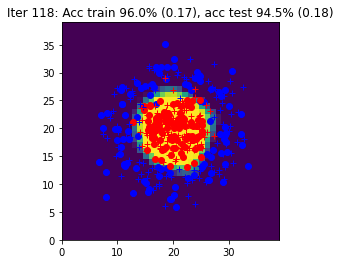

Iter 119: Acc train 96.0% (0.16), acc test 94.5% (0.18)


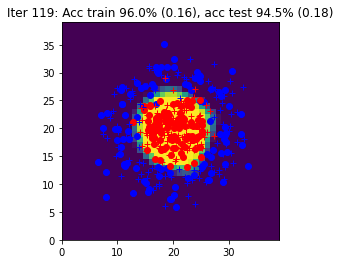

Iter 120: Acc train 96.0% (0.16), acc test 94.5% (0.18)


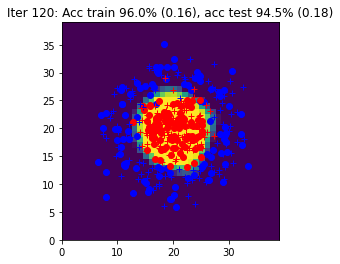

Iter 121: Acc train 96.0% (0.16), acc test 94.5% (0.18)


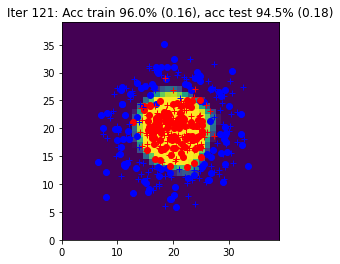

Iter 122: Acc train 96.0% (0.16), acc test 94.5% (0.18)


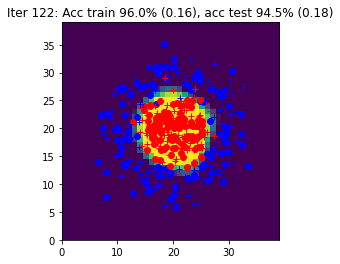

Iter 123: Acc train 96.0% (0.16), acc test 94.0% (0.18)


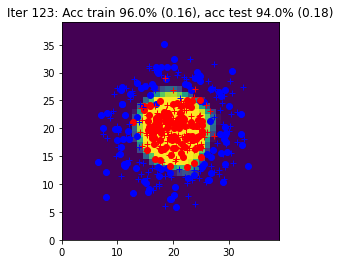

Iter 124: Acc train 96.0% (0.16), acc test 94.5% (0.18)


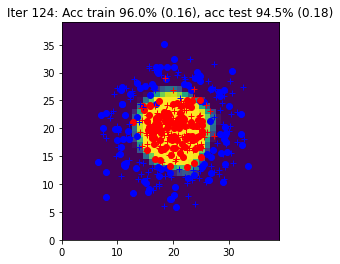

Iter 125: Acc train 96.0% (0.16), acc test 94.5% (0.18)


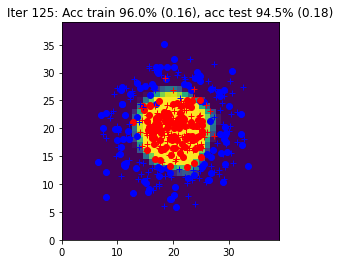

Iter 126: Acc train 96.0% (0.16), acc test 94.5% (0.18)


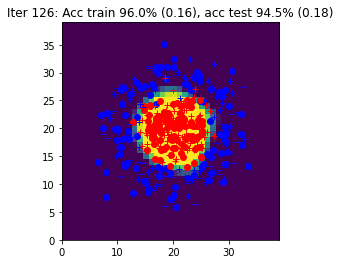

Iter 127: Acc train 96.0% (0.16), acc test 94.5% (0.18)


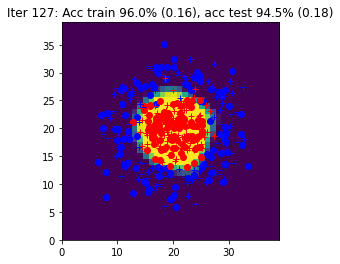

Iter 128: Acc train 96.0% (0.16), acc test 94.5% (0.18)


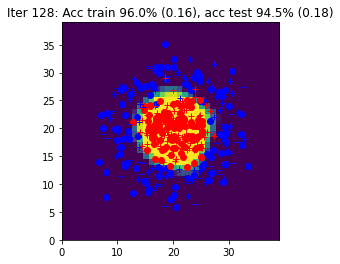

Iter 129: Acc train 96.0% (0.16), acc test 94.5% (0.18)


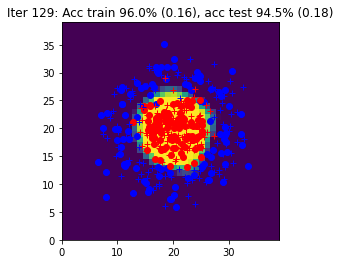

Iter 130: Acc train 96.0% (0.16), acc test 94.5% (0.18)


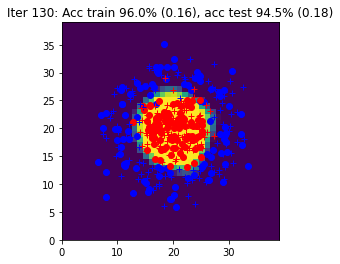

Iter 131: Acc train 96.0% (0.16), acc test 94.5% (0.17)


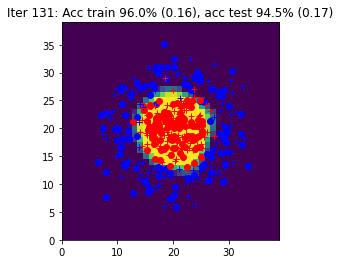

Iter 132: Acc train 96.0% (0.16), acc test 94.5% (0.17)


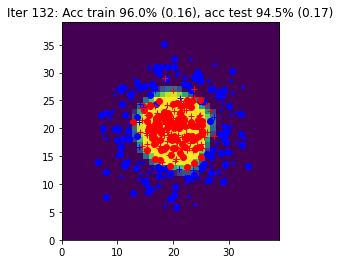

Iter 133: Acc train 96.0% (0.15), acc test 94.5% (0.17)


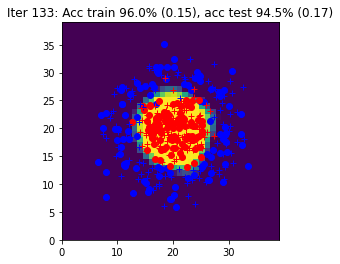

Iter 134: Acc train 96.0% (0.15), acc test 94.5% (0.17)


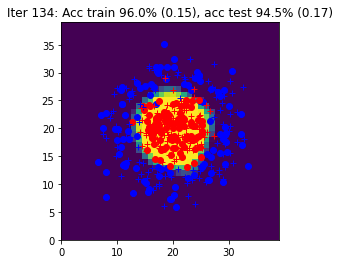

Iter 135: Acc train 96.0% (0.15), acc test 94.5% (0.17)


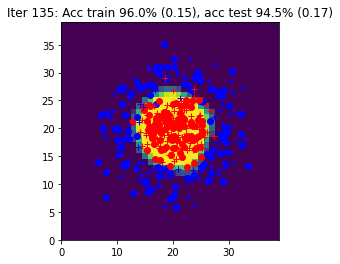

Iter 136: Acc train 96.0% (0.15), acc test 94.5% (0.17)


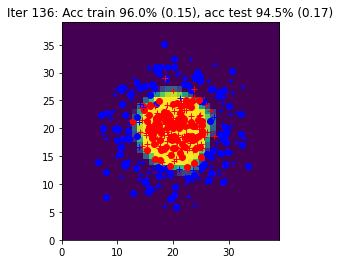

Iter 137: Acc train 96.0% (0.15), acc test 94.5% (0.17)


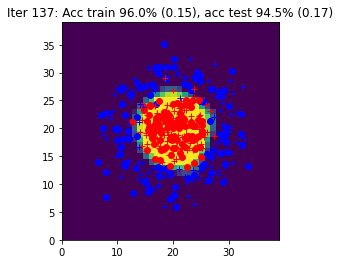

Iter 138: Acc train 96.0% (0.15), acc test 94.5% (0.17)


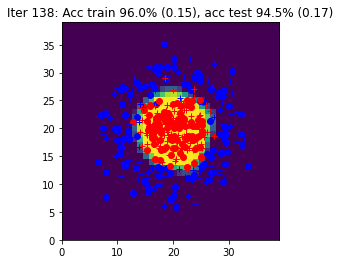

Iter 139: Acc train 96.0% (0.15), acc test 94.5% (0.17)


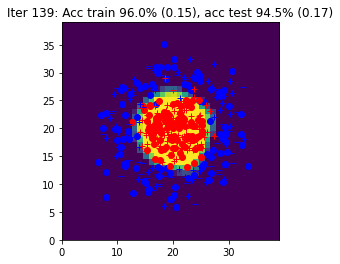

Iter 140: Acc train 96.0% (0.15), acc test 94.5% (0.17)


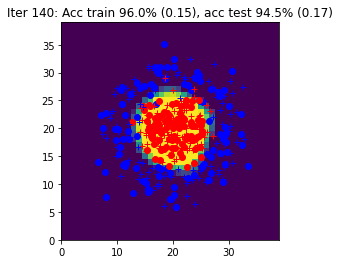

Iter 141: Acc train 96.0% (0.15), acc test 94.5% (0.17)


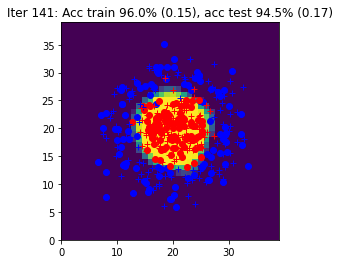

Iter 142: Acc train 96.0% (0.15), acc test 94.5% (0.17)


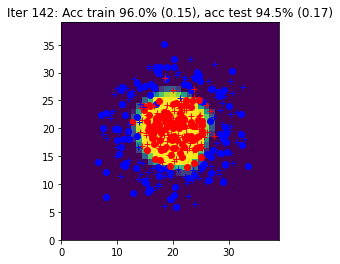

Iter 143: Acc train 96.0% (0.15), acc test 94.5% (0.17)


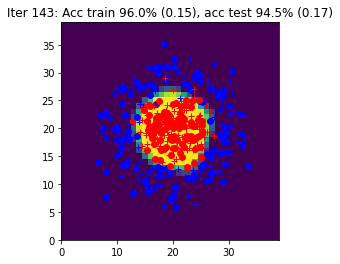

Iter 144: Acc train 96.5% (0.15), acc test 94.0% (0.17)


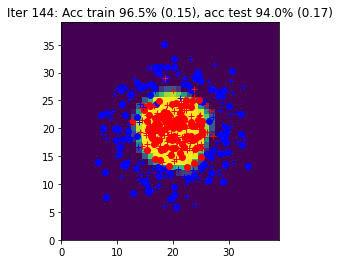

Iter 145: Acc train 96.0% (0.15), acc test 94.5% (0.17)


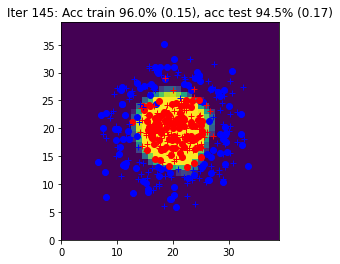

Iter 146: Acc train 96.0% (0.15), acc test 94.5% (0.17)


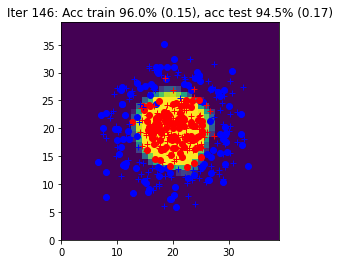

Iter 147: Acc train 96.0% (0.15), acc test 94.5% (0.17)


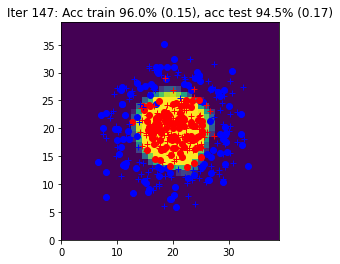

Iter 148: Acc train 96.0% (0.15), acc test 94.5% (0.17)


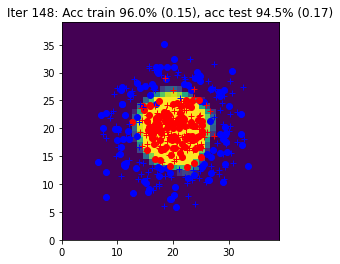

Iter 149: Acc train 96.0% (0.15), acc test 94.5% (0.17)


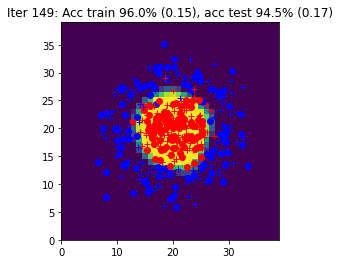

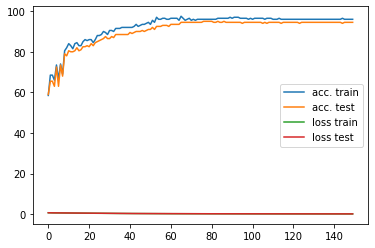

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions forward, loss_accuracy, sgd 
        # calculer les gradients avec la fonction backward de l'autograd 

        Yhat, outputs = forward(params, X)
        L, _ = loss_accuracy(Yhat, Y)
        L.backward()
        params = sgd(params, eta)

    ####################
    ##      FIN        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() est utilisé pour détacher les predictions du graphes de calcul autograd
    data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 3 : Simplification du forward avec `torch.nn`

`init_params` et `forward` sont supprimés et remplacés par une fonction `init_model` qui déclare l'architecture du modèle et la loss.

In [ ]:
def init_model(nx, nh, ny):

    #####################
    ## Votre code ici  ##
    #####################

    model = torch.nn.Sequential(
      torch.nn.Linear(nx, nh),
      torch.nn.Tanh(),
      torch.nn.Linear(nh, ny),
      torch.nn.Softmax()
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      FIN        #
    ####################

    return model, loss

In [ ]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Votre code ici  ##
    #####################
    # faire appel à la fonction de loss

    

    _, indsY = torch.max(Y, 1)
    _, indsYhat = torch.max(Yhat, 1)

    sum = 0
    for i in range(len(indsY)):
      if indsY[i] == indsYhat[i]:
        sum = sum + 1

    L = loss(Yhat, indsY)
    acc = sum / Yhat.size(0)

    ####################
    ##      FIN        #
    ####################

    return L, acc*100

In [ ]:
def sgd(model, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour les paramètres de model
    # attention à bien utiliser torch.no_grad()
    # et à remettre les accumulateurs de gradients à zéro

    with torch.no_grad():
        for param in model.parameters():
            param -= eta*param.grad
        model.zero_grad()

    ####################
    ##      FIN        #
    ####################
    return model

## Algorithme global d'apprentissage (avec autograd et les couches `torch.nn`)

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches

    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions loss_accuracy, sgd
        # effectuer le forward en faisant un appel au modèle 
        # calculer les gradients avec la fonction backward de l'autograd 

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 4 : Simplification de SGD avec `torch.optim`

In [ ]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Votre code ici  ##
    #####################

    model = torch.nn.Sequential(
      torch.nn.Linear(nx, nh),
      torch.nn.ReLU(),
      torch.nn.Linear(nh, ny),
      torch.nn.Sigmoid()
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      FIN        #
    ####################

    return model, loss, optim

La fonction `sgd` est supprimée. À la place, on fera un appel à `optim.zero_grad()` avant de faire le backward et à `optim.step()` après le backward. 

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant la fonction loss_accuracy
        # effectuer le forward en faisant un appel au modèle 
        # calculer les gradients avec la fonction backward de l'autograd 
        # Puis une "step" d'optimisation

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()


    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 5 : MNIST

Reprendre le code d'entraînement précédent en l'appliquant au dataset MNIST.

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(40):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Votre code ici  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant la fonction loss_accuracy
        # effectuer le forward en faisant un appel au modèle 
        # calculer les gradients avec la fonction backward de l'autograd 
        # Puis une "step" d'optimisation

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()


    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Partie 6: Bonus: SVM


Entrainez un modèle SVM sur le jeu de data Circles.
Le code à remplir est indiqué par des commentaires.


Idées : 
- Essayer d'abord un SVM linéaire (sklearn.svm.LinearSVC dans scikit-learn). Est-ce que cela fonctionne bien ? Pourquoi
- Essayer d'autres kernels (possible avec sklearn.svm.SVC).
Lequel fonctionne le mieux ? Pourquoi ?
- Est-ce que le paramètre C de régularisation à un impact ? Pourquoi ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Votre code ici   #######
### Entrainer le SVM #######
## Voir https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## et https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

# svm = sklearn.svm.LinearSVC(C=10**9)
# svm.fit(Xtrain, Ytrain)

svm = sklearn.svm.SVC(C=10**3)
svm.fit(Xtrain, Ytrain)

svm1 = sklearn.svm.SVC(C=10**2)
svm1.fit(Xtrain, Ytrain)

svm2 = sklearn.svm.SVC(C=10)
svm2.fit(Xtrain, Ytrain)

svm3 = sklearn.svm.SVC(C=5)
svm3.fit(Xtrain, Ytrain)

svm4 = sklearn.svm.SVC(C=1)
svm4.fit(Xtrain, Ytrain)


###########################

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
## Affichage des résultats

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

Ytest_pred = svm1.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm1.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

Ytest_pred = svm2.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm2.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

Ytest_pred = svm3.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm3.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

Ytest_pred = svm4.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm4.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

Q1. Essayer d'abord un SVM linéaire (sklearn.svm.LinearSVC dans scikit-learn)Est-ce que cela fonctionne bien ? Pourquoi

A: La fonction LinearSVC n'est pas efficace car elle ne peut réaliser qu'une classification linéaire. La distribution des données de l'ensemble de données que nous utilisons n'est pas linéaire, donc cette fonction ne peut pas très bien distinguer les échantillons de données. Par exemple, elle ne peut pas générer un cercle pour distinguer le centre des données. Il utilise la bibliothèque liblinear et ne peut classer que des données distribuées linéairement.

Q2: Essayer d'autres kernels (possible avec sklearn.svm.SVC).

A: La fonction svc fonctionne mieux. Il utilise la bibliothèque libsvm, qui peut réaliser la classification de données distribuées non linéairement.

Q3: Est-ce que le paramètre C de régularisation à un impact ? Pourquoi ?

A: Le paramètre de régularisation C est effectif. Grâce à des expériences, nous avons constaté que lorsque le paramètre de régularisation est trop grand, la précision de la prédiction diminue, ce qui devrait limiter la complexité du modèle. Cependant, si le paramètre C est trop petit, il y aura surapprentissage.